<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
from imblearn.over_sampling import SMOTE
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns

import random
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the Data

In [4]:
#Reading the dataset.
Data = pd.read_csv('/content/bank-1.csv')
Data.shape

(10000, 14)

In [5]:
df=Data.copy()

## Data Overview

### Displaying the first few rows of the dataset

In [6]:
# Let's view the first 5 rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Displaying the last few rows of the dataset

In [7]:
# Let's view the last 5 rows of the data
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Checking the shape of the dataset

In [8]:
# Checking the number of rows and columns in the data
df.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Checking the data types of the columns of the dataset

In [9]:
# Let's check the datatypes of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10K  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.


### Checking for duplicate values

In [10]:
# Let's check for duplicate values in the data
df.duplicated().sum()

0

* There are no duplicate values in the columns

In [11]:
# Let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* There are no null values in any columns

In [12]:
df["Exited"].value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

* It is an imbalanced dataset with around 80% of the customers have not exited and around 20% exited the bank

In [13]:
# Let's view the statistical summary of the numerical columns in the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


* 50% of the customers have credit score of 652, age of 37, tenure of 5 years, balance of 97198.54 and Estimated Salary of 100193.915.
* Of the customers there are more males than females, more located in France


* Each value of the column 'CustomerId' is a unique identifier for a customer. Hence we can drop this column as it will not add any predictive power or value to the model. So also are the columns RowNumber and Surname

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
feature_tm=df.describe(include=["object"]).columns.tolist()+df.select_dtypes(include=["int64"]).columns.tolist()
feature_del=["CreditScore","Age","Tenure","NumOfProducts"]
feature_cat=[i for i in feature_tm if i not in feature_del]
feature_tm=df.select_dtypes(include=np.number).columns.tolist()
feature_num=[i for i in feature_tm if i not in feature_cat]
feature_cat,feature_num

(['Surname',
  'Geography',
  'Gender',
  'RowNumber',
  'CustomerId',
  'HasCrCard',
  'IsActiveMember',
  'Exited'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'EstimatedSalary'])

- Segregating into numerical and categorical columns

In [17]:
def histogram_boxplot(data, feature,title, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # print(title)
    # plt.title(title)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True
    ).set_title(title)  # boxplot will be created and a triangle will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

In [18]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(f'Distribution of {predictor} for target={str(target_uniq[0])}')
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        stat="density",
    )

    axs[0, 1].set_title(f'Distribution of {predictor} for target={str(target_uniq[1])}')
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0],
                )

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [19]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5),
             )
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [21]:
def box_hist_plot(idx):
    histogram_boxplot(df, feature_num[idx],title=f'Box and hist plot for {feature_num[idx]}')

In [22]:
def plot_each_feature_num(idx_num):
    if idx_num<len(feature_num):
        histogram_boxplot(df, feature_num[idx_num],title=f'Box and hist plot for {feature_num[idx_num]}')
    else:
        print('Finished plotting numerical features')

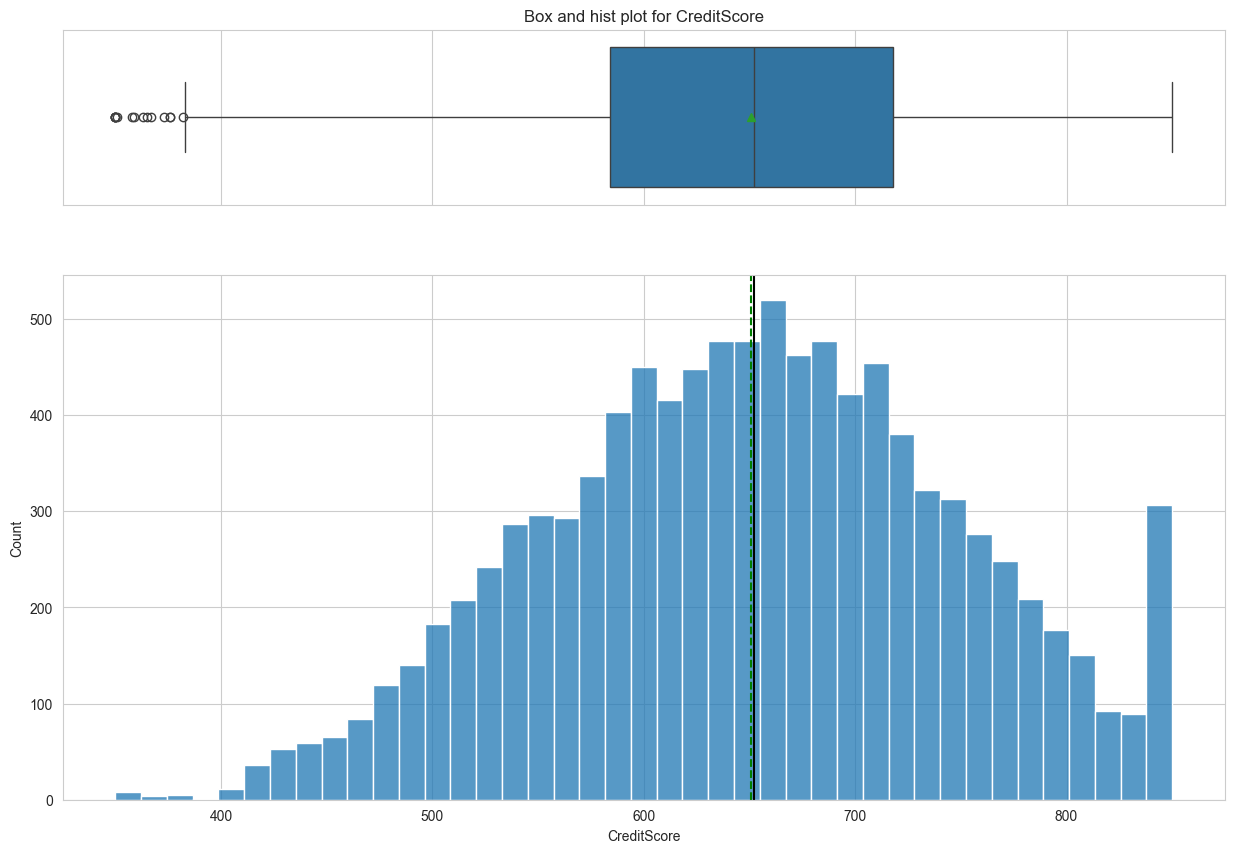

In [23]:
i=0
plot_each_feature_num(i)

## Observations:

* CreditScore is normally distributed with outliers on the left, with median being around 650
* The distribution is little left skewed
* There's continuity of data and valid values in the outliers. There could be customers with those credit scores that are marked as outliers, hence we don't consider them actually as outliers, and we'll leave them as is


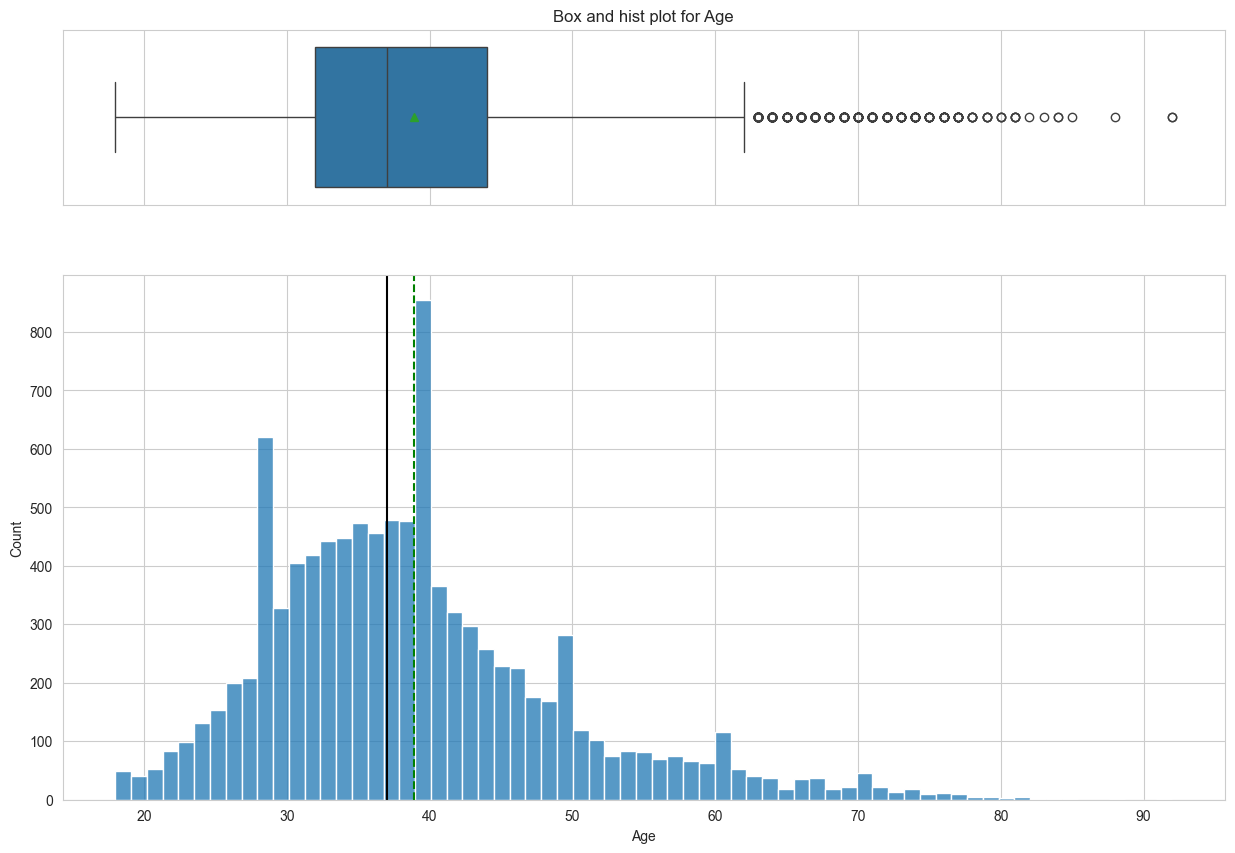

In [24]:
i+=1
plot_each_feature_num(i)

## Observations:

* Age has a right skewed distribution with outliers from around 65, with median being around 36 mean around 39
* Max age is around 94
* There's continuity of data and valid values in the outliers. There could be customers with ages that are marked as outliers, hence we don't consider them actually as outliers, and we'll leave them as is

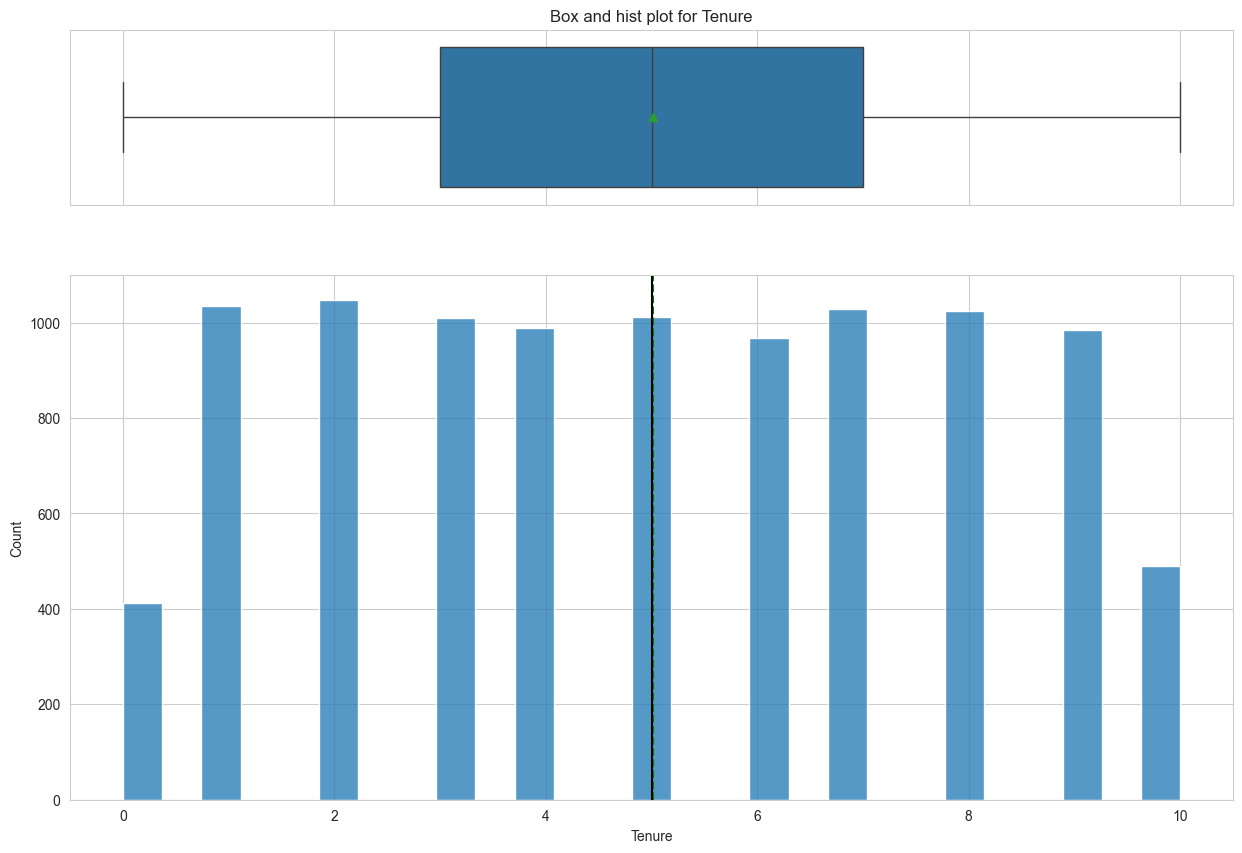

In [25]:
i+=1
plot_each_feature_num(i)

## Observations:

* Tenure is uniformly distributed with median and mean around 5 years
* There are no outliers
* There are lesser number of customers with Tenure less than 2 years and greater than 9 years

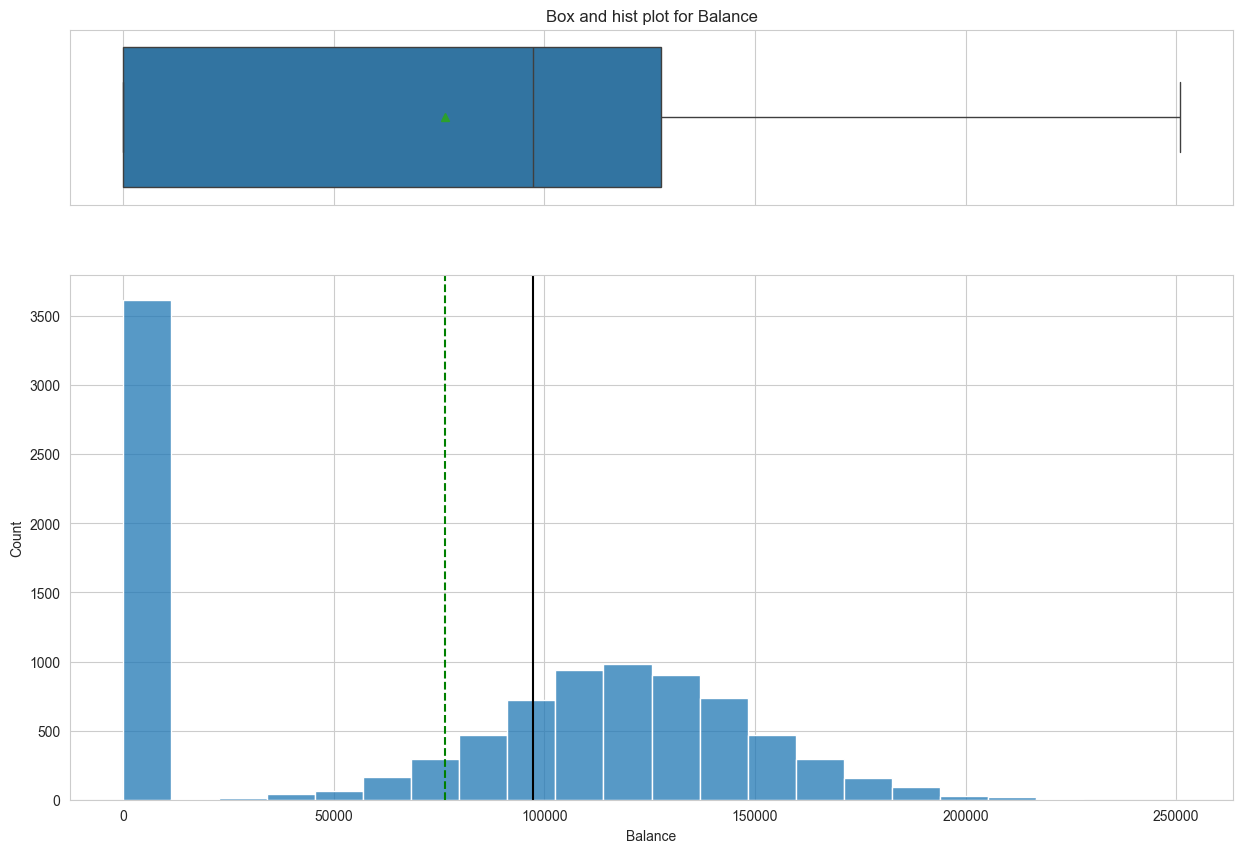

In [26]:
i+=1
plot_each_feature_num(i)

## Observations:

* Balance is left skewed with median around 9.5k and mean around 6.8k except for spike at 0 with around 3600 customers

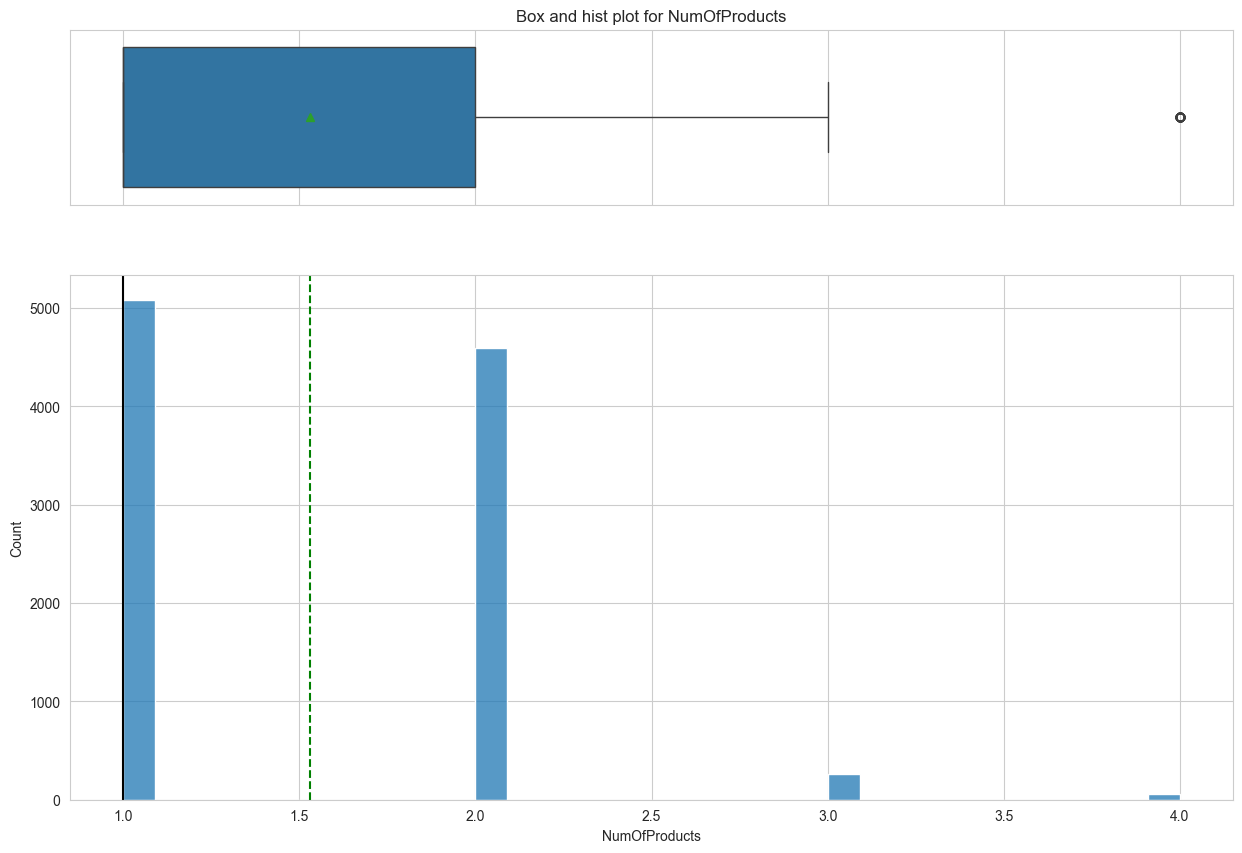

In [27]:
i+=1
plot_each_feature_num(i)

## Observations:

* NumOfProducts is highly right skewed with median being 1 and mean 1.5
* There are few customers with 4 products

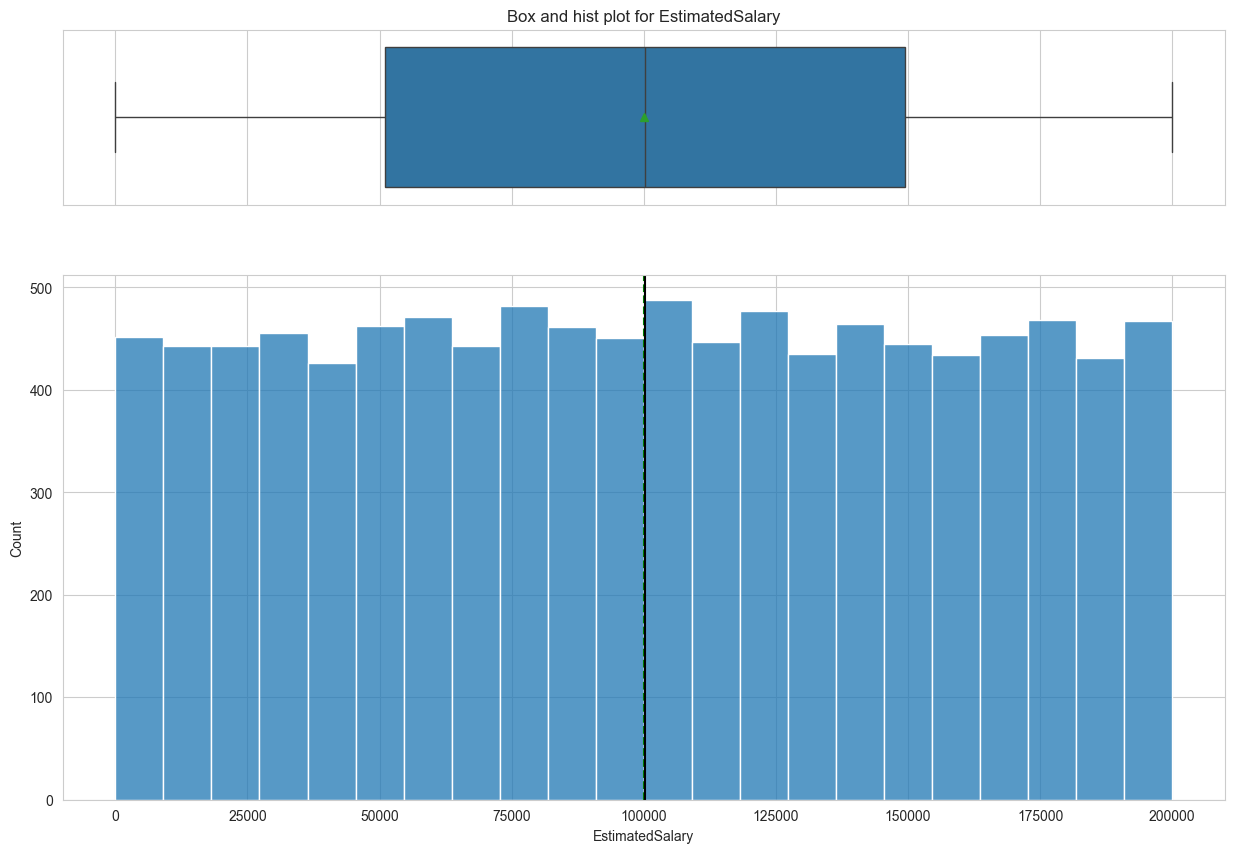

In [28]:
i+=1
plot_each_feature_num(i)

## Observations:

* EstimatedSalary is uniformly distributed with median and mean around 100K
* There are no outliers

In [29]:
i+=1
plot_each_feature_num(i)

Finished plotting numerical features


In [30]:
def plot_each_feature_cat(i):
    if i<len(feature_cat):
        if feature_cat[i] not in ['Surname','RowNumber','CustomerId']:
            labeled_barplot(df, feature_cat[i], perc=True)
        else:
            print('Increment the index')
    else:
        print('Finished plotting categorical features')


In [31]:
feat_cat_ind=0
plot_each_feature_cat(feat_cat_ind)

Increment the index


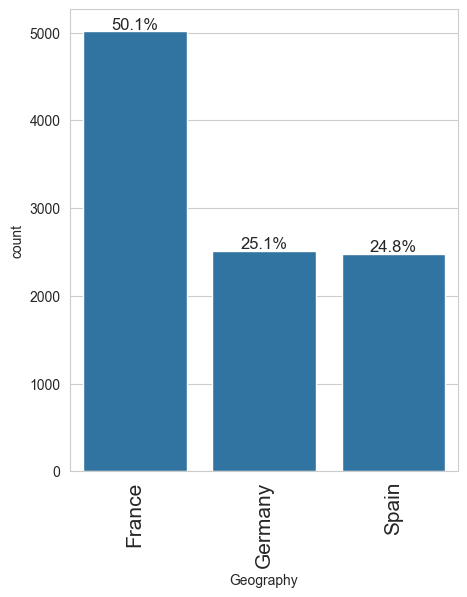

In [32]:
feat_cat_ind+=1
plot_each_feature_cat(feat_cat_ind)

## Observations:
* By Geography, around 50% of customers are in France,25% are in Germany and 24% are in Spain

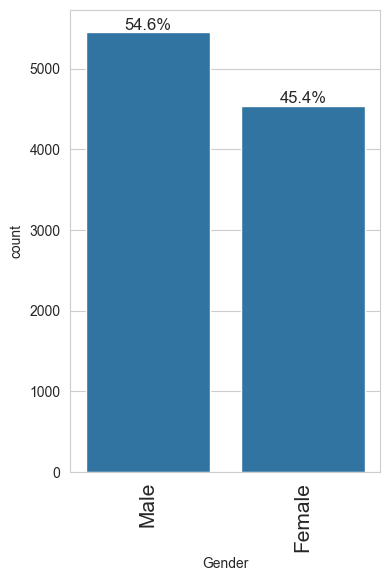

In [33]:
feat_cat_ind+=1
plot_each_feature_cat(feat_cat_ind)

## Observations:
* Male customers are around 54% and female customers are around 45%

In [34]:
feat_cat_ind+=1
plot_each_feature_cat(feat_cat_ind)

Increment the index


In [35]:
feat_cat_ind+=1
plot_each_feature_cat(feat_cat_ind)

Increment the index


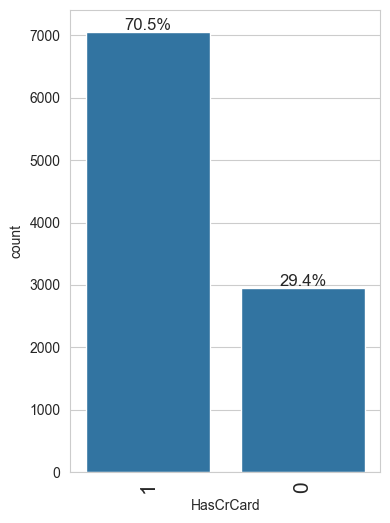

In [36]:
feat_cat_ind+=1
plot_each_feature_cat(feat_cat_ind)

## Observations:
* Around 70% of customers have credit card while around 29% don't have

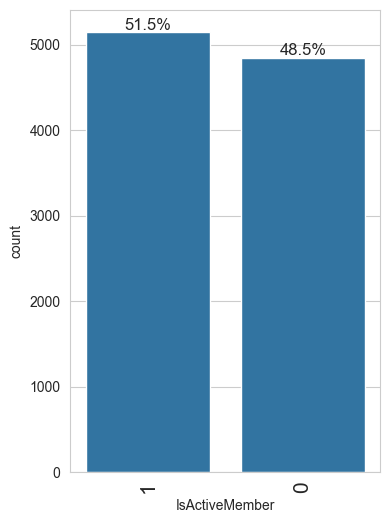

In [37]:
feat_cat_ind+=1
plot_each_feature_cat(feat_cat_ind)

## Observations:
* Around 51% of customers are active members using bank accounts regularly while around 48% aren't

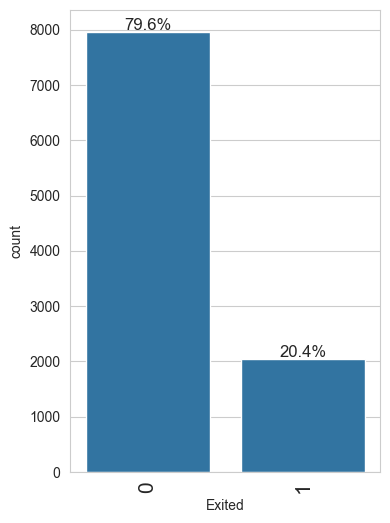

In [38]:
feat_cat_ind+=1
plot_each_feature_cat(feat_cat_ind)

## Observations:
* Around 79.6% of customers have been with the bank for six months while around 20% have left the bank in six months
* More customers are with the bank within six months

In [39]:
feat_cat_ind+=1
plot_each_feature_cat(feat_cat_ind)

Finished plotting categorical features


### Bivariate Analysis

In [40]:
def plot_bivariate(i):
    if i<len(feature_num):
        distribution_plot_wrt_target(df, feature_num[i], "Exited")
    else:
        print('Finished plotting bivariate')

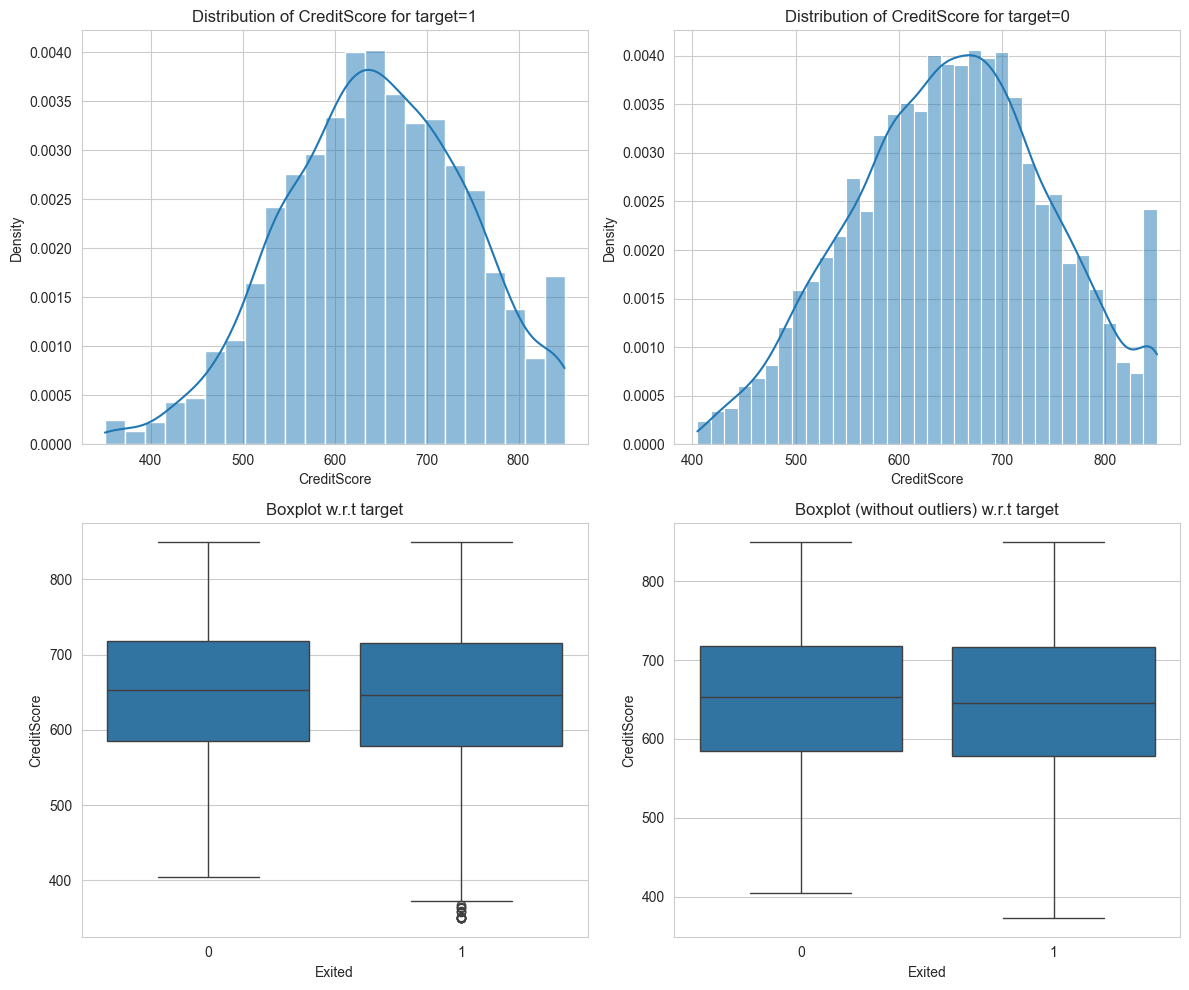

In [41]:
bivariate_ind=-1
bivariate_ind+=1
plot_bivariate(bivariate_ind)

## Observations:
Customers who exited have credit scores with left skewed distribution with peak around 600, median around 650

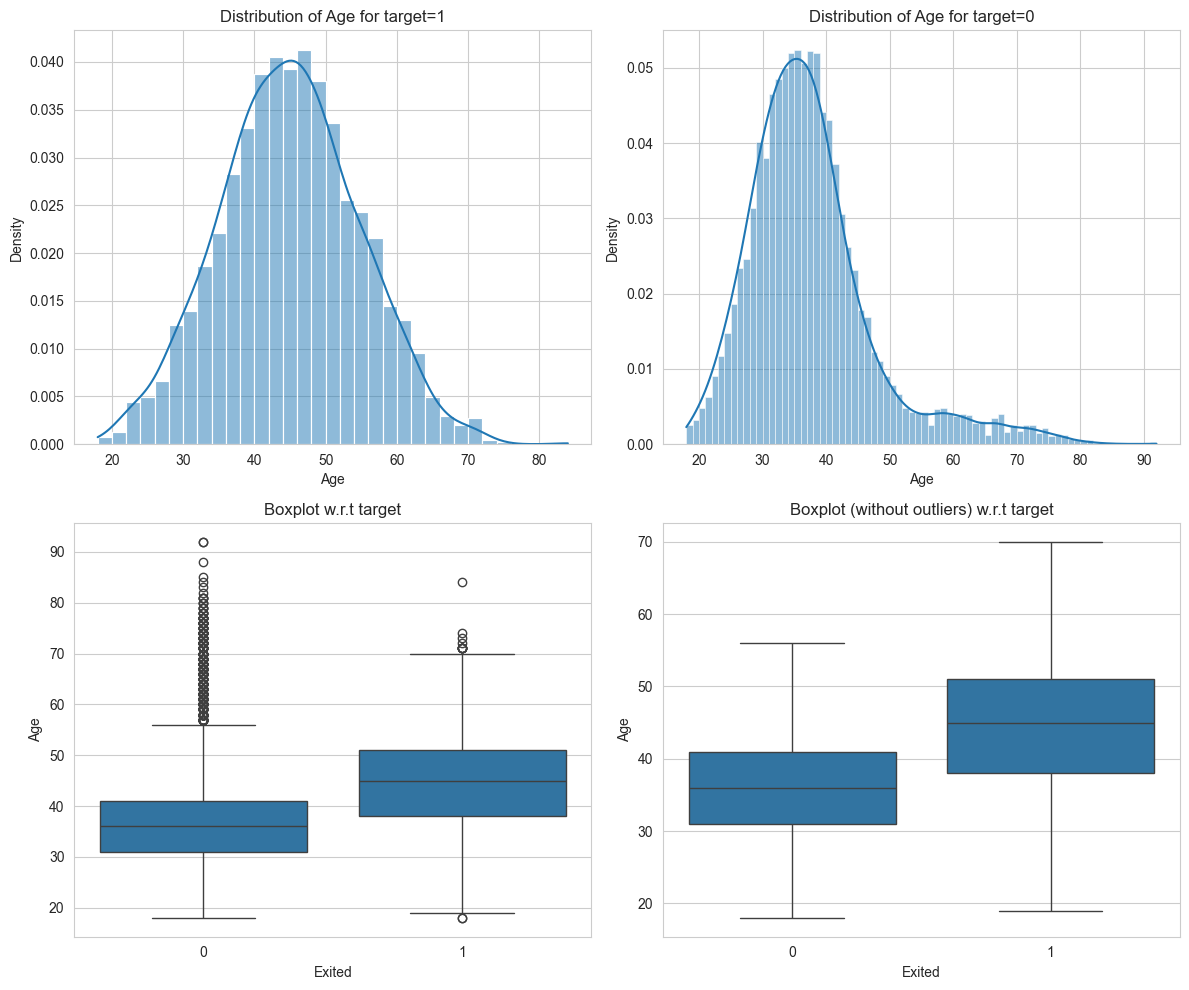

In [42]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

## Observations:
Customers who exited have age with fairly normal distribution with median around 45

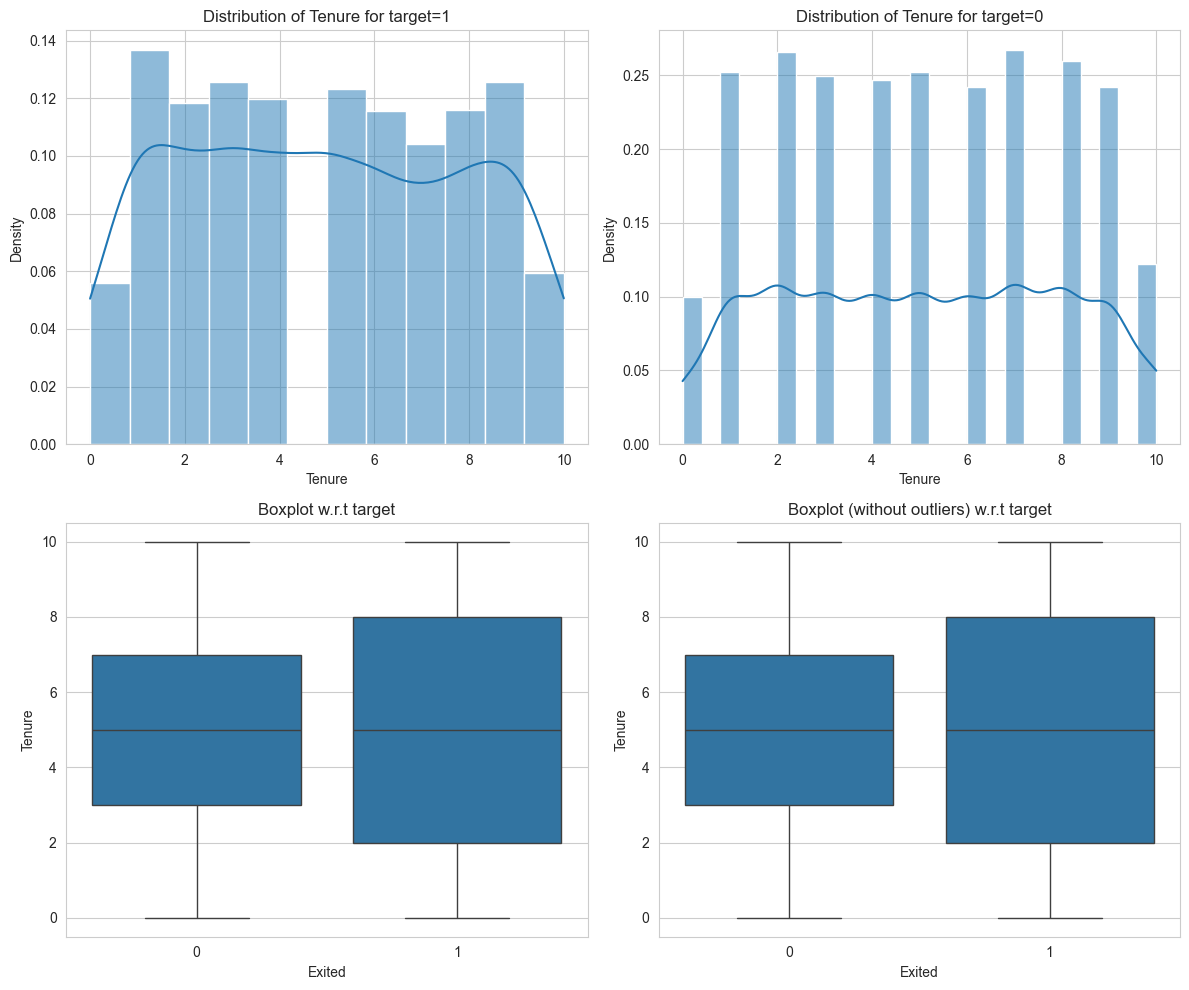

In [43]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

## Observations:
Customers who exited have tenure with a flat shaped distribution with median around 5 years

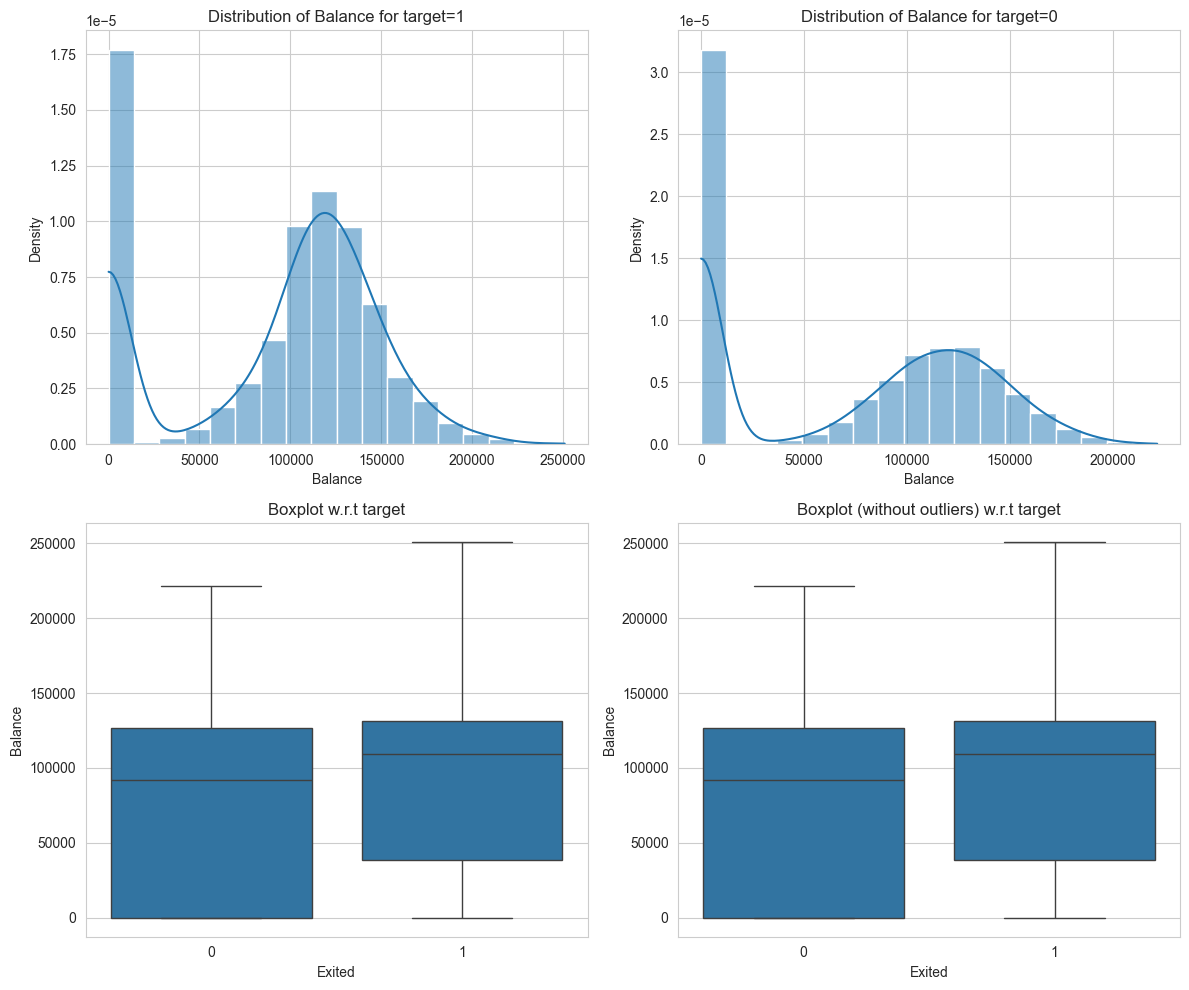

In [44]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

## Observations:
Customers with balance 100k to 150k have exited more, median is 120K
More customers who exited have a balance of 0

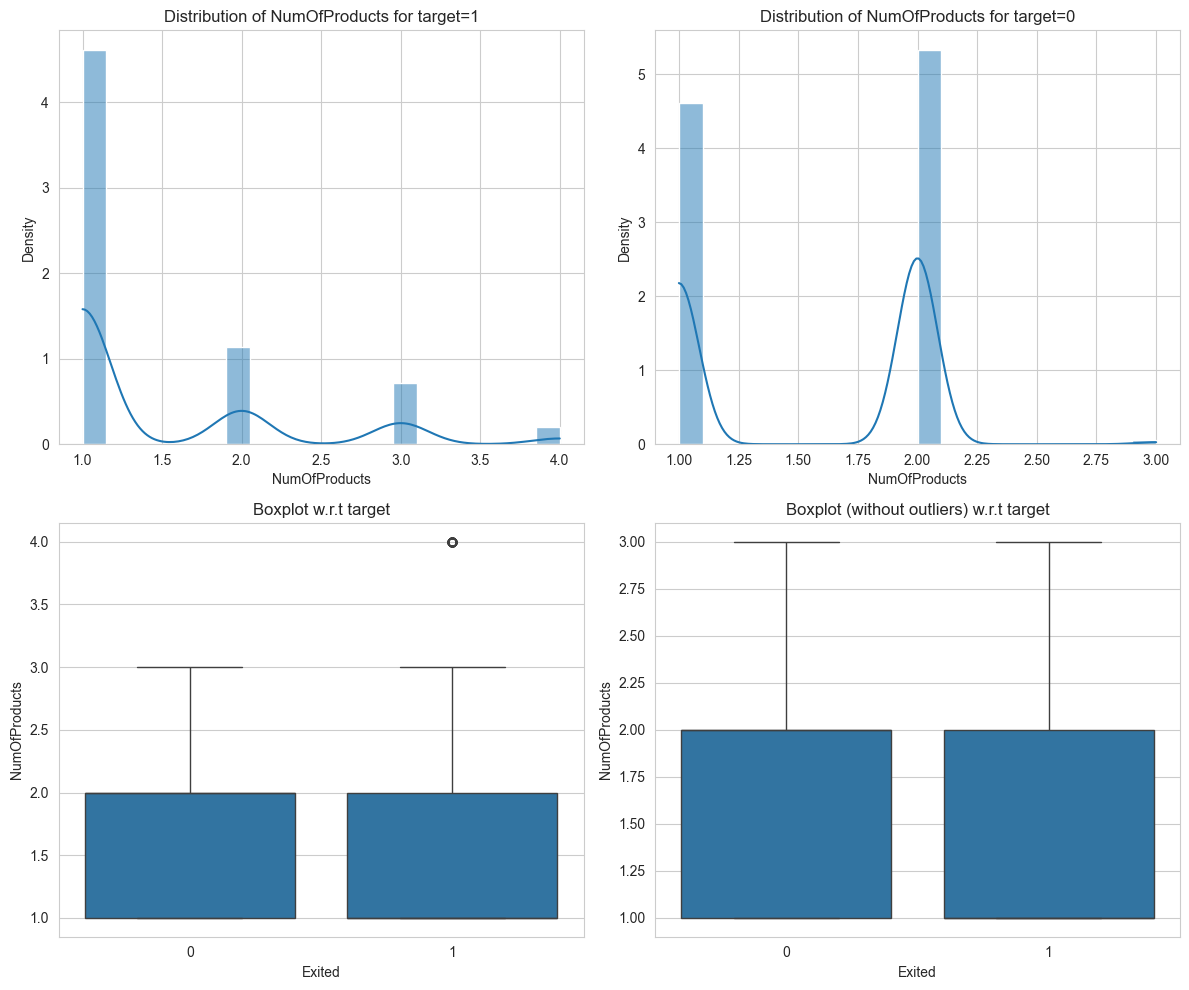

In [45]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

## Observations:
More customers with 1 product have exited and the distribution is right skewed

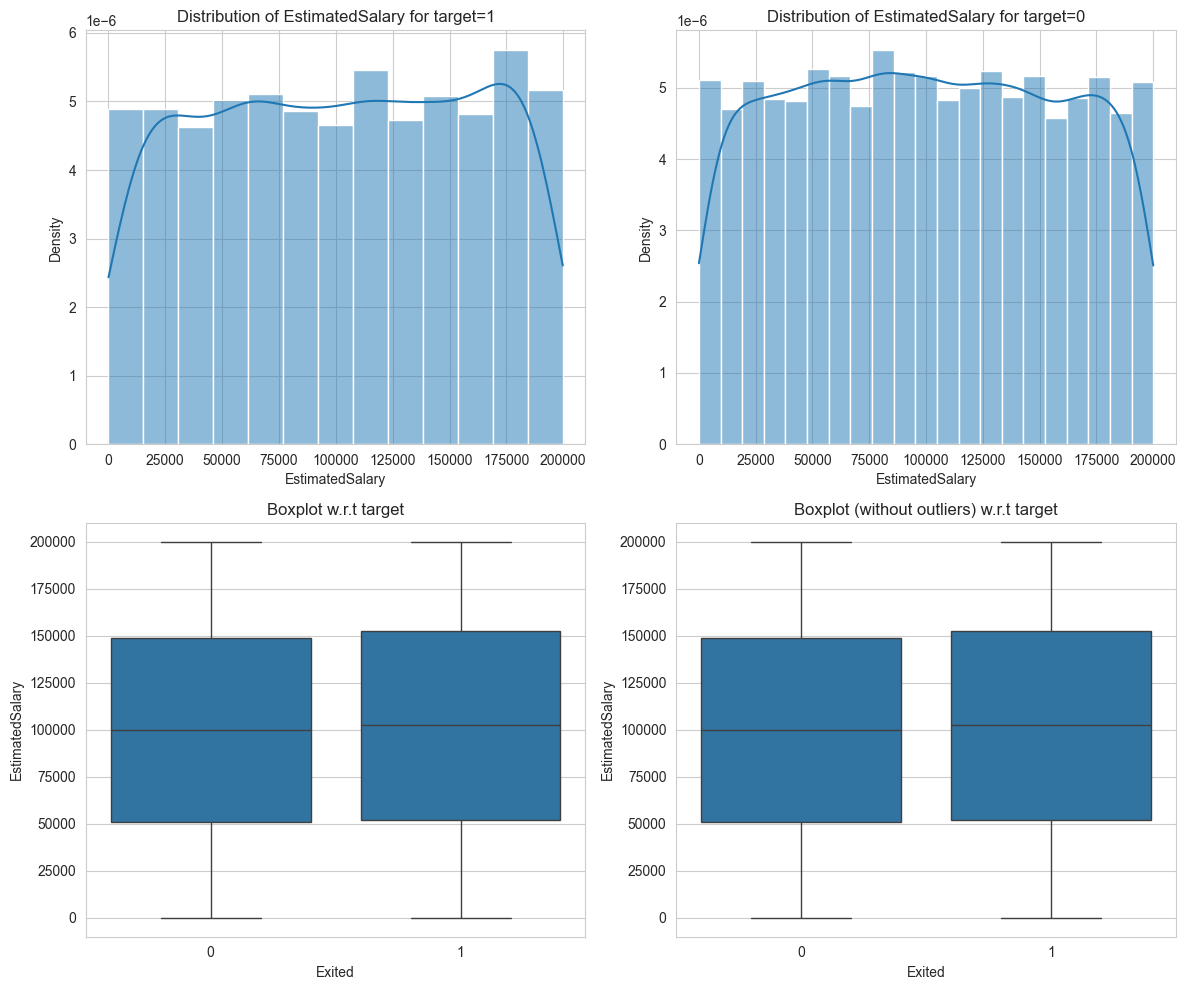

In [46]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

## Observations:
EstimatedSalary is uniformly distributed with median being 100K, highest is 175K

In [47]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

Finished plotting bivariate


In [48]:
def plot_each_stacked_bar(i):
    if i < len(feature_cat) and feature_cat[i]!="Exited" and feature_cat[i] not in ['Surname','RowNumber','CustomerId']:
        stacked_barplot(df, feature_cat[i], "Exited")
    elif feature_cat[i]=="Exited":
        pass
    elif feature_cat[i] in ['Surname','RowNumber','CustomerId']:
        print('Increment the index')
    else:
        print('Finished plotting stacked_bar')


In [49]:
stacked_bar_ind = 0
plot_each_stacked_bar(stacked_bar_ind)


Increment the index


Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


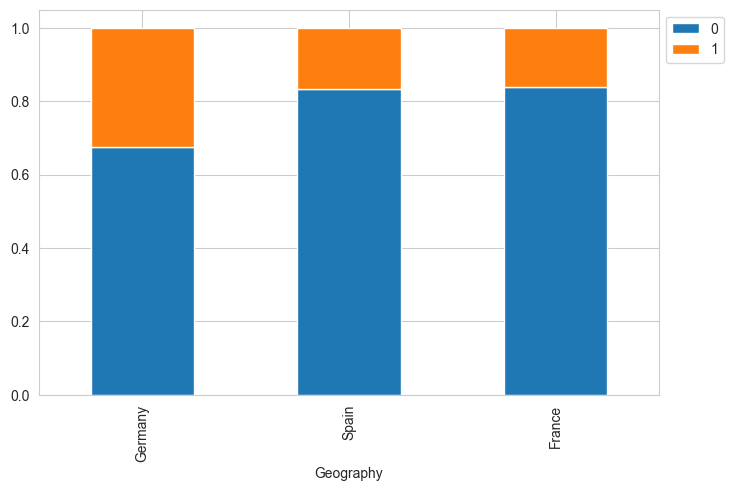

In [50]:
stacked_bar_ind+=1
plot_each_stacked_bar(stacked_bar_ind)

## Observations:
More customers left the bank from Germany

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


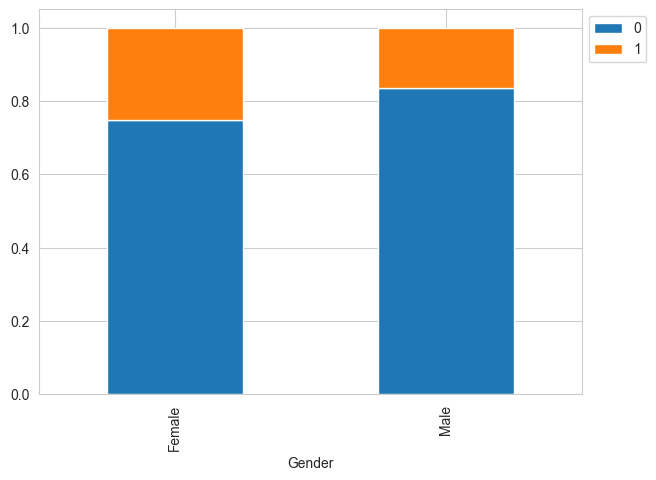

In [51]:
stacked_bar_ind+=1
plot_each_stacked_bar(stacked_bar_ind)

## Observations:
More females exited the bank than males

In [52]:
stacked_bar_ind+=1
plot_each_stacked_bar(stacked_bar_ind)

Increment the index


In [53]:
stacked_bar_ind += 1
plot_each_stacked_bar(stacked_bar_ind)

Increment the index


Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


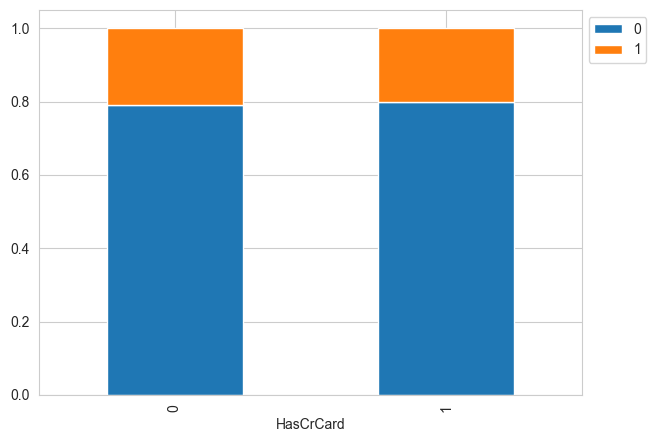

In [54]:
stacked_bar_ind += 1
plot_each_stacked_bar(stacked_bar_ind)

## Observations:
There's insignificant difference between the customers who have credit card vs who don't with respect to customer churn

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


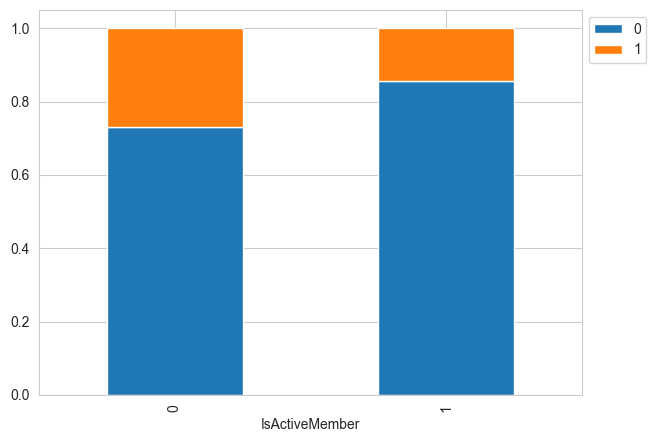

In [55]:
stacked_bar_ind += 1
plot_each_stacked_bar(stacked_bar_ind)

## Observations:
More customers who are not active have left the bank than those who are active

In [56]:
stacked_bar_ind += 1
plot_each_stacked_bar(stacked_bar_ind)

#### Determining correlation with the target attribute (Exited)

We could use Cramer's V to measure the strength of the association between two categorical variables
Interpretation:
 V=0: No association between the variables
 V close to 0: Weak association between the variables
 0.2<V<0.6: Moderate association between the variables
 V>0.6: Strong association between the variables
 V=1: Perfect association between the variables       

In [57]:
import scipy.stats as ss

def cramers_v(cm):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(cm)[0]
    n = cm.sum()
    phi2 = chi2 / n
    r, k = cm.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [58]:
for idx_cat in feature_cat:
    if idx_cat not in ['Surname','RowNumber','CustomerId','Exited']:
        cm = pd.crosstab(df[idx_cat], df['Exited'])
        cramers_val=cramers_v(cm.values)
        print(f'The Cramers V for {idx_cat} and Exited is  {cramers_val}')

The Cramers V for Geography and Exited is  0.17299857464855709
The Cramers V for Gender and Exited is  0.10579681691659651
The Cramers V for HasCrCard and Exited is  0.0
The Cramers V for IsActiveMember and Exited is  0.15556652756866268


## Observations:
Using Cramer's V We found that there's almost no correlation between any of the categorical features and the target.

A pointbiserial correlation coefficient, interpreted similarly to a Pearson correlation coefficient, indicates the strength and direction of the relationship between a binary (yes/no) variable and a continuous variable, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 signifying no correlation; a positive value means that higher values on the continuous variable tend to be associated with the "positive" category of the binary variable, while a negative value indicates the opposite trend. Point-biserial correlation values range from -1.0 to +1.0, with larger positive values indicating a stronger association between the two variables.

We could use pointbiserial correlation coefficient to measure strength of association between a binary variable and a continuous variable

In [59]:
import scipy.stats as stats

for num_ftr in feature_num:
    point_biserial=stats.pointbiserialr(df['Exited'], df[num_ftr])
    print(f'Exited vs {num_ftr}: {point_biserial}')


Exited vs CreditScore: SignificanceResult(statistic=-0.027093539754657805, pvalue=0.006738213892192126)
Exited vs Age: SignificanceResult(statistic=0.28532303783506796, pvalue=1.2399313093415674e-186)
Exited vs Tenure: SignificanceResult(statistic=-0.014000612253444641, pvalue=0.16152684949473095)
Exited vs Balance: SignificanceResult(statistic=0.118532768771634, pvalue=1.2755633191521227e-32)
Exited vs NumOfProducts: SignificanceResult(statistic=-0.04781986494944093, pvalue=1.7173330048039324e-06)
Exited vs EstimatedSalary: SignificanceResult(statistic=0.012096861026844652, pvalue=0.22644042802223582)


## Observations:
We see that for Exited vs Age,  higher values on the Income tend to be associated with the Exited(=1) category of the Exited. That means customers with higher Age tend to leave the bank, but this correlation is small 0.28. All others have a weak correlation

<Axes: >

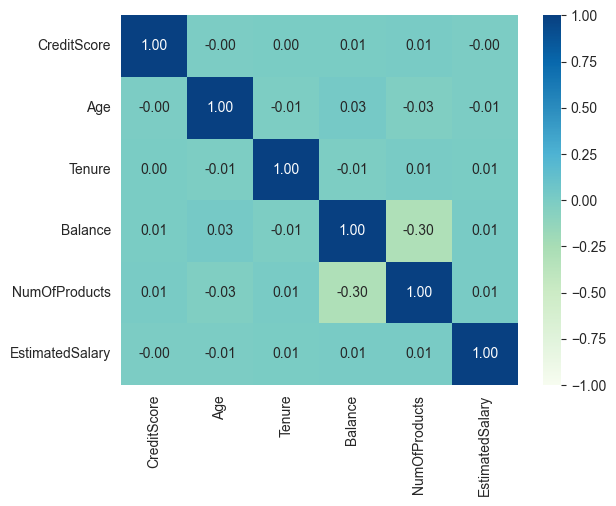

In [60]:
sns.heatmap(df[feature_num].corr(), annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="GnBu")

## Observations:
There's no correlation to very weak correlation between numerical features

## Data Preprocessing

In [61]:
# Let's check the number of unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [62]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [63]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


In [64]:
for i in df.select_dtypes(include=np.number):
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in RowNumber are :
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
**************************************************
Unique values in CustomerId are :
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
**************************************************
Unique values in CreditScore are :
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
**************************************************
Unique values in Age are :
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
****************

In [65]:
###Dropping the column as they will not add value to the modeling
Data1=df.copy()
df.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace=True)
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3769,698,France,Male,47,5,156265.31,2,0,0,1055.66,0
7223,799,Germany,Male,31,9,154586.92,1,0,1,88604.89,1


* 'RowNumber','CustomerId','Surname' columns are unique to each customer. They would not add any value to help predict customer churn. We could drop these columns

### Missing Value Imputation

In [66]:
## Separating Independent and Dependent Columns
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [67]:
#Calculating the total number of nan values for each columns.
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

- There are no missing values

### Encoding the categorical variables

In [68]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [69]:
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,dtype=int
)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [70]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [71]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [72]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


### Normalizing the numerical variables

In [73]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [74]:
X_train.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object

In [75]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

X_train[cols] = transformer.fit_transform(X_train[cols])
X_valid[cols] = transformer.transform(X_valid[cols])
X_test[cols] = transformer.transform(X_test[cols])

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,0.988678,0.572685,-1.384980,0.610704,-0.909878,1,0,1.566070,0,0,0
5735,-0.683985,0.477619,-0.355056,-1.237347,0.804346,0,1,0.036348,0,1,0
5652,0.410474,-0.948376,1.361485,-1.237347,0.804346,0,0,1.745403,0,0,0
26,1.081604,-0.282911,-1.041672,0.962063,-0.909878,1,1,1.228816,1,0,1
3596,-0.085130,-0.282911,-1.728288,1.144427,-0.909878,0,0,-0.764748,0,0,1


### Utility functions

In [76]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [77]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criteria

The objective is to predict customer churn for the bank(whether the customer will leave the bank) within six months. This helps the bank to understand which aspects of the service influence a customer's decision to leave. Management can concentrate efforts on improvement of those services, keeping in mind their priorities.

Neural networks help here because they bring out the inherent customer profile dynamics and the bank service dynamics which are otherwise difficult to learn. They can learn and identify intricate patterns in data, making them suitable for complex tasks
They can handle complex data, achieving high accuracy, and scalability.
They face challenges such as high computational demands, data dependency, and interpretability issues

Neural networks excel at processing and learning from complex, unstructured data like images, text, and audio. 
High Accuracy:
Deep learning models can achieve high accuracy in tasks like image recognition, natural language processing, and prediction. 
Scalability:
Deep learning models are highly scalable, meaning they can handle large datasets and perform computations efficiently. 
Continuous Learning:
Unlike traditional machine learning algorithms, deep learning models can continuously learn and improve with more data. 

Though these disadvantages also need to be considered:
Computational Demands:
Training deep learning models requires significant computational resources, including powerful hardware and extensive time. 
Data Dependency:
Deep learning models require large amounts of high-quality data for training, which can be difficult and expensive to obtain. 
Overfitting:
Deep learning models can overfit the training data, meaning they perform well on the training set but poorly on unseen data. 
Lack of Interpretability (Black Box):
Deep learning models can be difficult to interpret, making it hard to understand how they arrive at their decisions. 
Sensitivity to Input Data:
The performance of neural networks can be heavily influenced by the quality and preprocessing of the input data. 
Ethical Considerations:
Deep learning models can perpetuate biases present in the training data, leading to unfair or discriminatory outcomes. 
Cost-Effectiveness:
While training deep learning models can be costly, they can also help businesses save money by automating tasks and improving efficiency. 

Here we'll be using neural networks for prediction.

**Model can make wrong predictions as:**

1. Predicting a customer will not leave the bank within 6 months, but in reality the customer would leave(customer churn).

2. Predicting a customer will leave the bank within 6 months, but in reality the customer would not(no customer churn).

**Which case is more important?**

* It's ok to predict a customer will leave the bank though he will not (FalsePositive), but it's not ok to predict a potential customer churn as he is not a potential customer churn(FalseNegative).
* If we predict a potential customer churn as a non-potential churn customer bank would lose a potential customer.

**How to reduce this loss i.e need to reduce False Negatives?**
*  Recall=True Positives/(True Positives + False Negatives). `recall` should be maximized, the greater the recall, the higher the chances of minimizing the false negatives.

**Which case is more important?**

Both cases are actually important for the purposes of this case study. Not improving services that are needed to a potential customer on the verge of a churn (by wrongly classifying them as not likely to leave) might lead to increased churn, and the bank might lose a good customer affecting the revenue of the bank. However, improving the services needed by a customer who will not leave the bank (due to wrong prediction) would lead to a unnecessary financial investment for the company, and giving such customers an increased amount of attention and priority might not lead to reducing customer churn of the bank.
Of the two, it is of prime importance to serve the customer who is on the verge of leaving the bank, thereby reduce customer churn.

**How to reduce this loss i.e need to reduce False Negatives**

Since False Negative errors are important for us to minimize, the company would want the Recall Score evaluation metric to be maximized. Hence, the focus should be on increasing the Recall score.


As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [78]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)
print(f'{cw=}')
# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

print(f'{cw_dict=}')

cw=array([1.25588697, 4.90797546])
cw_dict={0: 1.2558869701726845, 1: 4.9079754601226995}


In [79]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Model 0

- Let's start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [306]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [307]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [308]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [309]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Recall'])

In [310]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
print(history)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 1.3925 - recall: 0.2945 - val_loss: 0.6622 - val_recall: 0.4417
Epoch 2/25
100/100 [==============================] - 0s 3ms/step - loss: 1.3492 - recall: 0.5291 - val_loss: 0.6722 - val_recall: 0.5675
Epoch 3/25
100/100 [==============================] - 0s 3ms/step - loss: 1.3249 - recall: 0.5798 - val_loss: 0.6659 - val_recall: 0.6135
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2996 - recall: 0.6319 - val_loss: 0.6456 - val_recall: 0.6258
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2732 - recall: 0.6465 - val_loss: 0.6310 - val_recall: 0.6442
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2475 - recall: 0.6641 - val_loss: 0.6162 - val_recall: 0.6595
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2237 - recall: 0.6771 - val_loss: 0.6109 - val_recall: 0.6840
Epoch 8/25
100/100 [==============

In [311]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.948549747467041


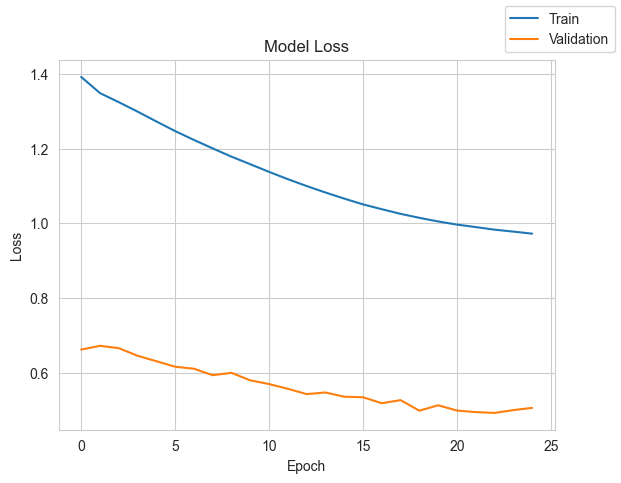

In [312]:
plot(history,'loss')

- Train loss and validation loss decrease with epochs
- The rate of train loss decrease is more than that of validation loss with each epoch

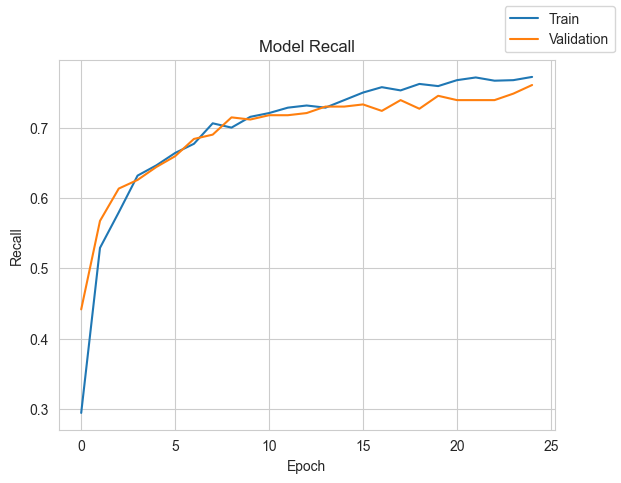

In [315]:
plot(history,'recall')

* The recall scores of both training and validation are increasing upward in tandem

In [313]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 612us/step


,Accuracy,Recall,Precision,F1 Score
0,0.754844,0.754844,0.832795,0.775665


In [314]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 617us/step


,Accuracy,Recall,Precision,F1 Score
0,0.74125,0.74125,0.821645,0.763354


- Train Recall score of ~0.75 and validation Recall score of ~0.74 indicate consistent performance of the model between training and validation datasets.

- Even though it's a good score, the rate of improvement over the epochs is still low.

### Model 1

- Let's try adding momentum to check whether it's accelerating the learning process.

In [89]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [90]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [92]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Recall'])

In [93]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 1.2870 - val_loss: 0.5973
Epoch 2/25
100/100 [==============================] - 0s 2ms/step - loss: 1.1077 - val_loss: 0.5147
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0097 - val_loss: 0.5168
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9711 - val_loss: 0.5139
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9606 - val_loss: 0.4227
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9489 - val_loss: 0.4685
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9428 - val_loss: 0.4696
Epoch 8/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9405 - val_loss: 0.5027
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9293 - val_loss: 0.5802
Epoch 10/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9347 - val_loss: 0.4898

In [94]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.457917213439941


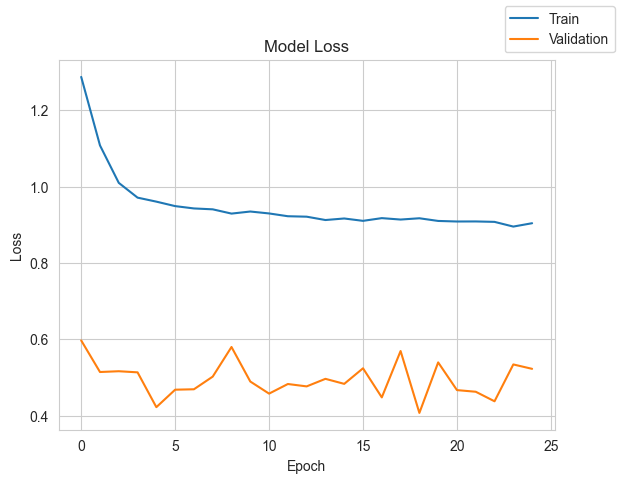

In [95]:
plot(history,'loss')

* The addition of momentum causes the rate of reduction in the loss to increase
* The validation loss stays between 0.4 and 0.6

In [96]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 612us/step


,Accuracy,Recall,Precision,F1 Score
0,0.757969,0.757969,0.843659,0.779283


In [97]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 [==============================] - 0s 724us/step


,Accuracy,Recall,Precision,F1 Score
0,0.745625,0.745625,0.834759,0.76823


- As expected, there is a improvement in the train scores by a small amount
- The rate of decrease in training loss increased with the addition of momentum
- But, the difference between the train and valid scores have increased.

### Model 2

- Let's change the optimizer to Adam
    - This will introduce momentum as well as an adaptive learning rate

In [98]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [99]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [100]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [101]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Recall'])

In [102]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 3ms/step - loss: 1.3176 - val_loss: 0.6053
Epoch 2/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1959 - val_loss: 0.5710
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 1.1291 - val_loss: 0.5662
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0832 - val_loss: 0.5459
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0471 - val_loss: 0.5174
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0184 - val_loss: 0.4991
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9974 - val_loss: 0.5078
Epoch 8/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9812 - val_loss: 0.4906
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9679 - val_loss: 0.5111
Epoch 10/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9597 - val_loss: 0.5022

In [103]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.31853985786438


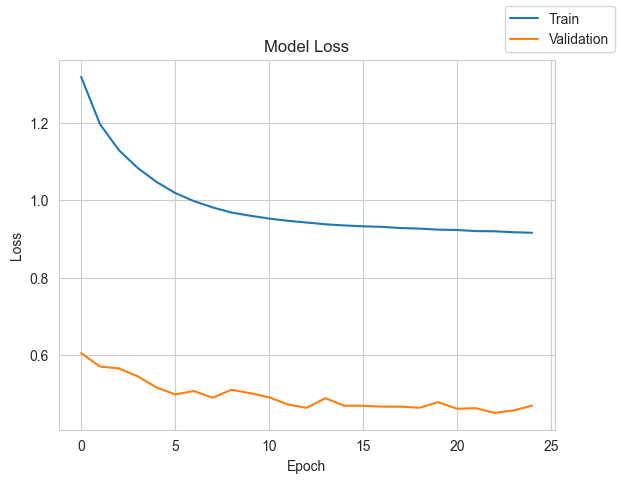

In [104]:
plot(history,'loss')

* With adam, the loss curve of validation loss smoothened due to Adam's adaptive momentum.
* Also there's more decrease in the loss of validation loss compared to SGD with momentum

In [105]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 662us/step


,Accuracy,Recall,Precision,F1 Score
0,0.782031,0.782031,0.841301,0.798714


In [106]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 698us/step


,Accuracy,Recall,Precision,F1 Score
0,0.769375,0.769375,0.828797,0.786869


- The difference between the train and valid scores have increased but recall score increased from the previous models
- Recall score for validation around 0.76

### Model 3

- The difference between the train loss and test loss is high.
- Let's add dropout to regularize it.

In [107]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [108]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [110]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Recall'])

In [111]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 1.4216 - val_loss: 0.6506
Epoch 2/25
100/100 [==============================] - 0s 2ms/step - loss: 1.3494 - val_loss: 0.6298
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 1.3096 - val_loss: 0.6107
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2846 - val_loss: 0.5909
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2538 - val_loss: 0.5803
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2219 - val_loss: 0.5576
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2123 - val_loss: 0.5499
Epoch 8/25
100/100 [==============================] - 0s 2ms/step - loss: 1.1989 - val_loss: 0.5404
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 1.1814 - val_loss: 0.5363
Epoch 10/25
100/100 [==============================] - 0s 2ms/step - loss: 1.1583 - val_loss: 0.5286

In [112]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.5268566608428955


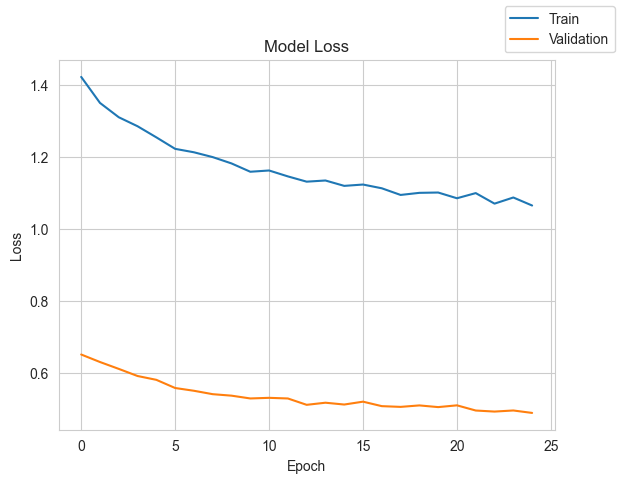

In [113]:
plot(history,'loss')

* with dropout the decrease in loss is less compared to the previous model with Adam optimizer and without dropout
* The rate of decrease in loss is also less compared to the previous model with Adam optimizer and without dropout

In [114]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

200/200 [==============================] - 0s 739us/step


,Accuracy,Recall,Precision,F1 Score
0,0.785625,0.785625,0.83428,0.800482


In [115]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 [==============================] - 0s 614us/step


,Accuracy,Recall,Precision,F1 Score
0,0.7675,0.7675,0.822847,0.784472


- The difference between train and validation scores has still not reduced.
- The recall scores are not a significant improvement

### Model 4

- The scores are still not that good.
- Let's add batch normalization to see whether we can stabilize the training process and thereby improve the scores.

In [116]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [117]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [118]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 batch_normalization (BatchN  (None, 14)               56        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 365
Trainable params: 323
Non-trainable pa

In [119]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Recall'])

In [120]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 5ms/step - loss: 1.4105 - val_loss: 0.6478
Epoch 2/25
100/100 [==============================] - 0s 3ms/step - loss: 1.2225 - val_loss: 0.5844
Epoch 3/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1411 - val_loss: 0.5635
Epoch 4/25
100/100 [==============================] - 0s 3ms/step - loss: 1.0912 - val_loss: 0.5481
Epoch 5/25
100/100 [==============================] - 0s 3ms/step - loss: 1.0569 - val_loss: 0.5474
Epoch 6/25
100/100 [==============================] - 0s 3ms/step - loss: 1.0254 - val_loss: 0.5296
Epoch 7/25
100/100 [==============================] - 0s 3ms/step - loss: 1.0166 - val_loss: 0.5374
Epoch 8/25
100/100 [==============================] - 0s 3ms/step - loss: 1.0012 - val_loss: 0.5238
Epoch 9/25
100/100 [==============================] - 0s 3ms/step - loss: 0.9948 - val_loss: 0.5194
Epoch 10/25
100/100 [==============================] - 0s 3ms/step - loss: 0.9780 - val_loss: 0.5113

In [121]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.369963645935059


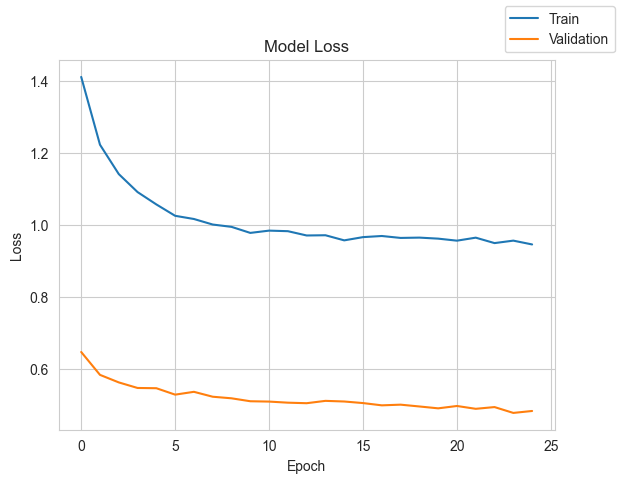

In [122]:
plot(history,'loss')

* The decrease in loss is not significant compared to the previous models

In [123]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

200/200 [==============================] - 0s 797us/step


,Accuracy,Recall,Precision,F1 Score
0,0.775,0.775,0.84009,0.792902


In [124]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 [==============================] - 0s 821us/step


,Accuracy,Recall,Precision,F1 Score
0,0.75,0.75,0.821116,0.770373


- There's no improvement in the scores.

### Model 5

- Let's add both batchnormalization and dropout.

In [125]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [126]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [127]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 batch_normalization (BatchN  (None, 14)               56        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0

In [128]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Recall'])

In [129]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 1.5362 - val_loss: 0.5974
Epoch 2/25
100/100 [==============================] - 0s 3ms/step - loss: 1.3558 - val_loss: 0.5531
Epoch 3/25
100/100 [==============================] - 0s 3ms/step - loss: 1.2840 - val_loss: 0.5407
Epoch 4/25
100/100 [==============================] - 0s 3ms/step - loss: 1.2434 - val_loss: 0.5288
Epoch 5/25
100/100 [==============================] - 0s 3ms/step - loss: 1.2222 - val_loss: 0.5213
Epoch 6/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1722 - val_loss: 0.5085
Epoch 7/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1759 - val_loss: 0.5019
Epoch 8/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1508 - val_loss: 0.4930
Epoch 9/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1490 - val_loss: 0.4878
Epoch 10/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1392 - val_loss: 0.4906

In [130]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.63495135307312


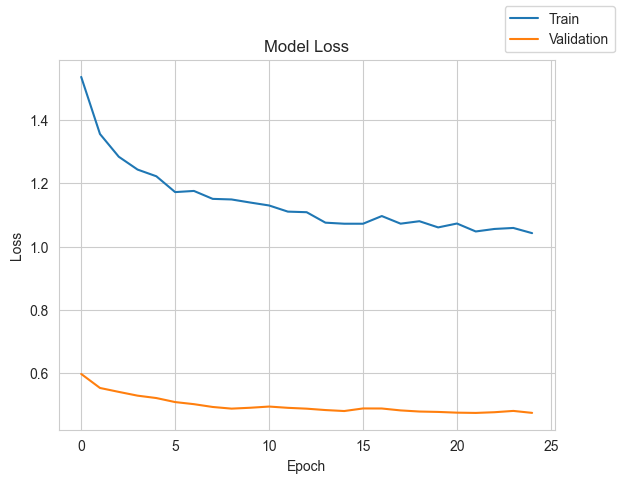

In [131]:
plot(history,'loss')

* The decrease in loss is not comparable to the previous models
* The validation loss is smooth decrease

In [132]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

200/200 [==============================] - 0s 818us/step


,Accuracy,Recall,Precision,F1 Score
0,0.782188,0.782188,0.837413,0.798284


In [133]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

50/50 [==============================] - 0s 829us/step


,Accuracy,Recall,Precision,F1 Score
0,0.7675,0.7675,0.825456,0.784887


- There's improvement in the recall scores, but there has been a slight increase in the difference between train and validation scores.

### Model 6

- Let's initialize the weights using He normal.
- We'll also use only Dropout for regularization.

In [134]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [135]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [137]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Recall'])

In [138]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 3ms/step - loss: 1.4082 - val_loss: 0.6797
Epoch 2/25
100/100 [==============================] - 0s 2ms/step - loss: 1.3721 - val_loss: 0.6614
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 1.3430 - val_loss: 0.6500
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 1.3167 - val_loss: 0.6302
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2696 - val_loss: 0.6216
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2392 - val_loss: 0.5906
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2329 - val_loss: 0.5790
Epoch 8/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2065 - val_loss: 0.5694
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 1.1902 - val_loss: 0.5653
Epoch 10/25
100/100 [==============================] - 0s 2ms/step - loss: 1.1853 - val_loss: 0.5508

In [139]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.533840179443359


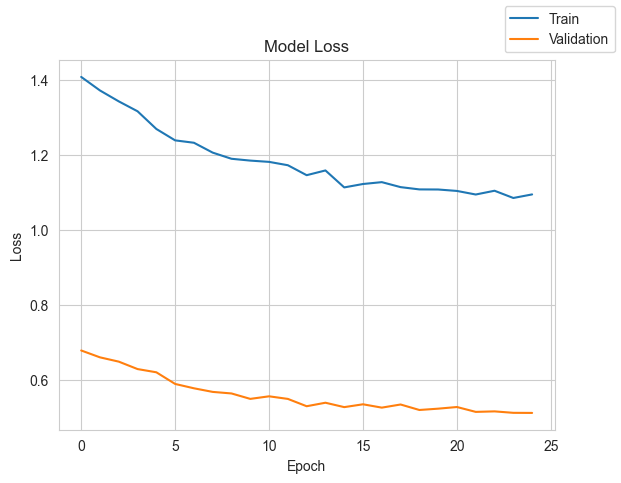

In [140]:
plot(history,'loss')

* The rate of decrease in loss is much less compared to the previous models
* The training loss is around 1.1 at epoch 24

In [141]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

200/200 [==============================] - 0s 659us/step


,Accuracy,Recall,Precision,F1 Score
0,0.775469,0.775469,0.833392,0.792369


In [142]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

50/50 [==============================] - 0s 889us/step


,Accuracy,Recall,Precision,F1 Score
0,0.770625,0.770625,0.829926,0.788024


- There's a slight decrease in the scores.
- The difference between train and validation scores has also reduced.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [143]:
print('Before UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Before UpSampling, the shape of train_X: (6400, 11)
Before UpSampling, the shape of train_y: (6400,) 

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 


In [144]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [145]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [146]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [147]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [148]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 0s 4ms/step - loss: 1.2466 - val_loss: 0.5367
Epoch 2/25
100/100 [==============================] - 0s 3ms/step - loss: 1.0195 - val_loss: 0.4645
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9765 - val_loss: 0.4844
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9598 - val_loss: 0.4683
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9581 - val_loss: 0.4250
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9429 - val_loss: 0.4918
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9349 - val_loss: 0.4542
Epoch 8/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9356 - val_loss: 0.4698
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9219 - val_loss: 0.5711
Epoch 10/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9271 - val_loss: 0.4700

In [149]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.568498373031616


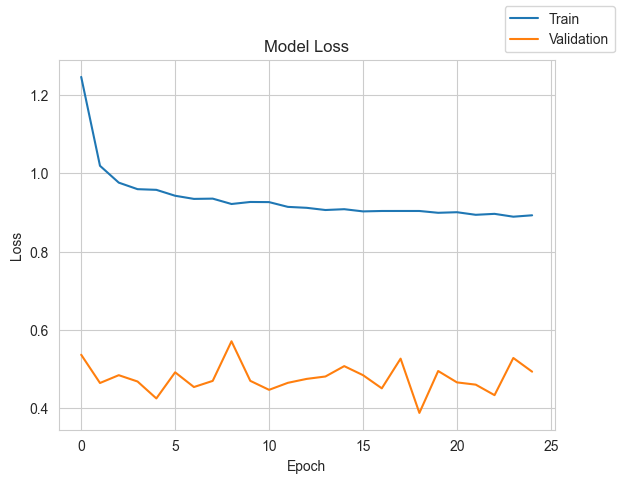

In [150]:
plot(history,'loss')

* The loss decrease is better than the previous model
* The validation loss curve is spiky with SGD with momentum and using SMOTE upsampling

In [151]:
model_7_train_perf = model_performance_classification(model, X_train, y_train)
model_7_train_perf

200/200 [==============================] - 0s 668us/step


,Accuracy,Recall,Precision,F1 Score
0,0.772344,0.772344,0.847925,0.791608


In [152]:
model_7_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_7_valid_perf

50/50 [==============================] - 0s 742us/step


,Accuracy,Recall,Precision,F1 Score
0,0.7625,0.7625,0.84454,0.783134


- As expected, there is a small improvement in the train scores.
- But, the difference between the train and valid scores have increased compared to other previous models

## SMOTE with Adam and dropout

In [187]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [188]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [189]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [192]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [193]:
start = time.time()
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 [==============================] - 1s 4ms/step - loss: 0.7343 - recall: 0.5557 - val_loss: 0.6659 - val_recall: 0.6626
Epoch 2/25
160/160 [==============================] - 0s 3ms/step - loss: 0.6656 - recall: 0.7025 - val_loss: 0.6285 - val_recall: 0.6994
Epoch 3/25
160/160 [==============================] - 0s 2ms/step - loss: 0.6321 - recall: 0.7098 - val_loss: 0.5910 - val_recall: 0.6687
Epoch 4/25
160/160 [==============================] - 0s 2ms/step - loss: 0.6124 - recall: 0.7325 - val_loss: 0.5731 - val_recall: 0.6626
Epoch 5/25
160/160 [==============================] - 0s 2ms/step - loss: 0.5991 - recall: 0.7217 - val_loss: 0.5659 - val_recall: 0.6626
Epoch 6/25
160/160 [==============================] - 0s 2ms/step - loss: 0.5896 - recall: 0.7241 - val_loss: 0.5512 - val_recall: 0.6534
Epoch 7/25
160/160 [==============================] - 0s 2ms/step - loss: 0.5780 - recall: 0.7196 - val_loss: 0.5310 - val_recall: 0.6503
Epoch 8/25
160/160 [==============

In [194]:
print("Time taken in seconds ",end-start)

Time taken in seconds  9.773496389389038


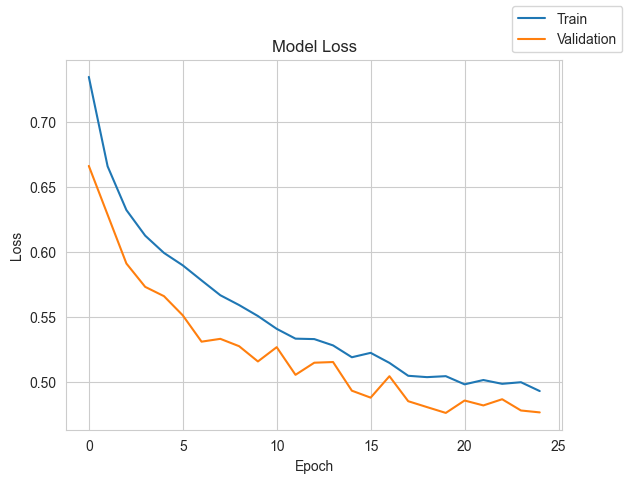

In [195]:
plot(history,'loss')

* The loss curves of train and validation are converging and trending down syncronously
* The difference between the losses of train and validation is constant which is a significant improvement from the rest of the models
* The loss has reduced to less than 0.5 which is less compared to the previous models

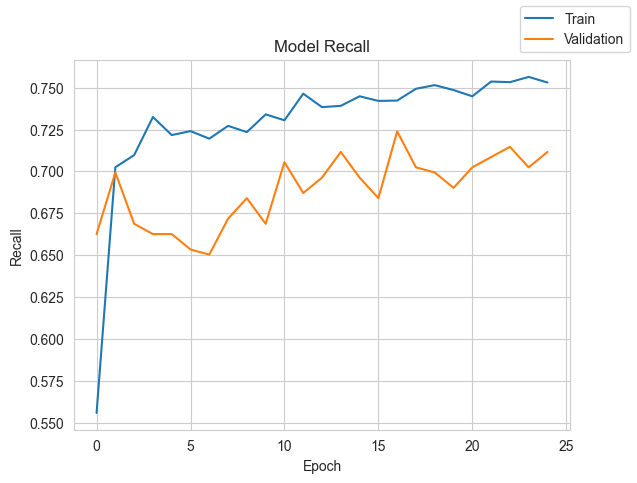

In [197]:
plot(history,'recall')

* The recall scores increase gradually, the validation recall score is more spiky

In [160]:
model_8_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_8_train_perf

319/319 [==============================] - 0s 687us/step


,Accuracy,Recall,Precision,F1 Score
0,0.799549,0.799549,0.800144,0.799449


In [161]:
model_8_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_8_valid_perf

50/50 [==============================] - 0s 679us/step


,Accuracy,Recall,Precision,F1 Score
0,0.786875,0.786875,0.821053,0.798793


- There's a slight improvement in the scores for both train and validation
- The difference between train and validation scores is not huge

## SMOTE with Adam with regularizers and dropout

In [272]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [275]:
#Initializing the neural network
l2=tf.keras.regularizers.l2(0.001)
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",kernel_regularizer=l2,input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal",kernel_regularizer=l2))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [277]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [278]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [279]:
start = time.time()
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 [==============================] - 1s 4ms/step - loss: 0.9496 - recall: 0.7310 - val_loss: 0.7297 - val_recall: 0.7669
Epoch 2/25
160/160 [==============================] - 0s 2ms/step - loss: 0.7316 - recall: 0.4959 - val_loss: 0.6720 - val_recall: 0.5675
Epoch 3/25
160/160 [==============================] - 0s 2ms/step - loss: 0.6998 - recall: 0.4382 - val_loss: 0.6460 - val_recall: 0.4785
Epoch 4/25
160/160 [==============================] - 0s 2ms/step - loss: 0.6836 - recall: 0.4896 - val_loss: 0.6315 - val_recall: 0.5706
Epoch 5/25
160/160 [==============================] - 0s 2ms/step - loss: 0.6693 - recall: 0.5616 - val_loss: 0.6156 - val_recall: 0.5951
Epoch 6/25
160/160 [==============================] - 0s 2ms/step - loss: 0.6531 - recall: 0.5852 - val_loss: 0.6015 - val_recall: 0.6043
Epoch 7/25
160/160 [==============================] - 0s 2ms/step - loss: 0.6440 - recall: 0.6026 - val_loss: 0.5943 - val_recall: 0.6104
Epoch 8/25
160/160 [==============

In [280]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.318812847137451


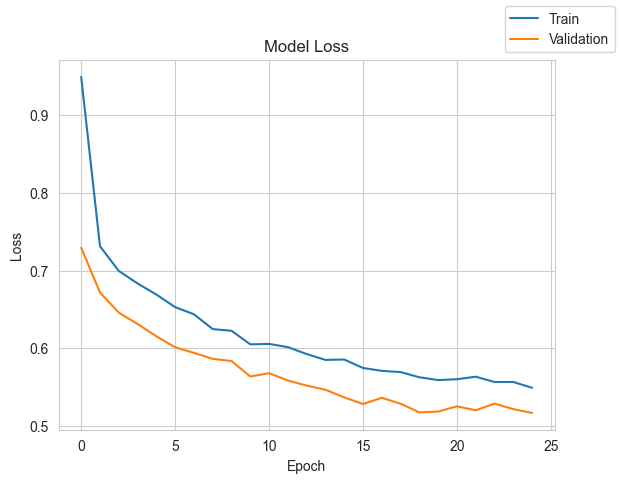

In [281]:
plot(history,'loss')

* The loss curves of train and validation are both smooth converging and trending down syncronously. This looks like the best loss curves plot so far.
* The difference between the losses of train and validation is constant which is good like the prvious model
* The loss has increased above 0.5 compared to previous model

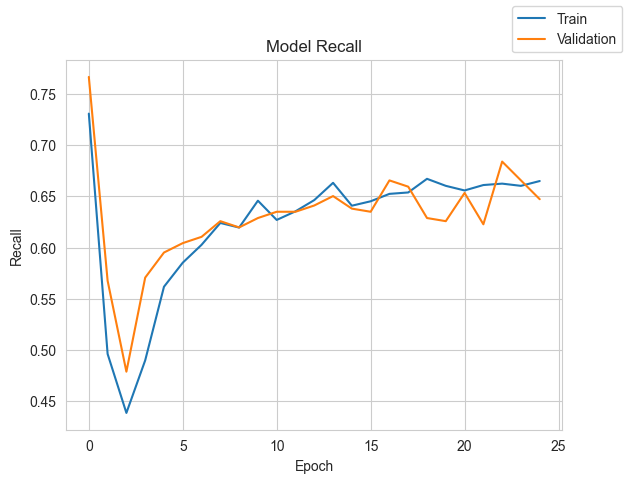

In [282]:
plot(history,'recall')

* Both the recall curves are trending upwards and synchronously which is good improvement

In [283]:
model_9_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_9_train_perf

319/319 [==============================] - 0s 689us/step


,Accuracy,Recall,Precision,F1 Score
0,0.783752,0.783752,0.785355,0.783448


In [284]:
model_9_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_9_valid_perf

50/50 [==============================] - 0s 660us/step


,Accuracy,Recall,Precision,F1 Score
0,0.7825,0.7825,0.813865,0.793885


- The recall scores are little less than that of previous model SMOTE with Adam and dropout
- The difference between train and validation scores reduced and scores are nearly same

## Model Performance Comparison and Final Model Selection

In [285]:
#Validation performance comparison

models_train_comp_met_cols_df = pd.concat(
    [
        model_0_train_perf,
        model_1_train_perf,
        model_2_train_perf,
        model_3_train_perf,
        model_4_train_perf,
        model_5_train_perf,
        model_6_train_perf,
        model_7_train_perf,
        model_8_train_perf,
        model_9_train_perf
    ]
)


In [286]:
list_mdl_cols = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",
    "Neural Network (SMOTE SGD)",
    "Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)",
    "Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)"
]
models_train_comp_met_cols_df.index=list_mdl_cols
models_train_comp_met_cols_df

,Accuracy,Recall,Precision,F1 Score
"Neural Network (SGD, No Regularization)",0.754062,0.754062,0.827223,0.774403
"Neural Network (SGD with Momentum, No Regularization)",0.757969,0.757969,0.843659,0.779283
"Neural Network (Adam , No Regularization)",0.782031,0.782031,0.841301,0.798714
"Neural Network (Adam, dropout [0.4,0.2])",0.785625,0.785625,0.834280,0.800482
"Neural Network (Adam, Batch Normalization)",0.775000,0.775000,0.840090,0.792902
"Neural Network (dropout [0.4,0.2], Batch Normalization)",0.782188,0.782188,0.837413,0.798284
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",0.775469,0.775469,0.833392,0.792369
Neural Network (SMOTE SGD),0.772344,0.772344,0.847925,0.791608
"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)",0.799549,0.799549,0.800144,0.799449
"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)",0.783752,0.783752,0.785355,0.783448


In [287]:
models_train_comp_met_cols_df.sort_values(by='Recall',ascending=False)

,Accuracy,Recall,Precision,F1 Score
"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)",0.799549,0.799549,0.800144,0.799449
"Neural Network (Adam, dropout [0.4,0.2])",0.785625,0.785625,0.834280,0.800482
"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)",0.783752,0.783752,0.785355,0.783448
"Neural Network (dropout [0.4,0.2], Batch Normalization)",0.782188,0.782188,0.837413,0.798284
"Neural Network (Adam , No Regularization)",0.782031,0.782031,0.841301,0.798714
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",0.775469,0.775469,0.833392,0.792369
"Neural Network (Adam, Batch Normalization)",0.775000,0.775000,0.840090,0.792902
Neural Network (SMOTE SGD),0.772344,0.772344,0.847925,0.791608
"Neural Network (SGD with Momentum, No Regularization)",0.757969,0.757969,0.843659,0.779283
"Neural Network (SGD, No Regularization)",0.754062,0.754062,0.827223,0.774403


* On training set, the model with Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization) performed well with a recall score around 79.95% 

In [288]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T,
        model_8_train_perf.T,
        model_9_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",
    "Neural Network (SMOTE SGD)",
    "Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)",
    "Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)"
]

In [289]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T,
        model_7_valid_perf.T,
        model_8_valid_perf.T,
        model_9_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",
    "Neural Network (SMOTE SGD)",
    "Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)",
    "Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)"
]

In [290]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",Neural Network (SMOTE SGD),"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)","Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)"
Accuracy,0.754062,0.757969,0.782031,0.785625,0.775000,0.782188,0.775469,0.772344,0.799549,0.783752
Recall,0.754062,0.757969,0.782031,0.785625,0.775000,0.782188,0.775469,0.772344,0.799549,0.783752
Precision,0.827223,0.843659,0.841301,0.834280,0.840090,0.837413,0.833392,0.847925,0.800144,0.785355
F1 Score,0.774403,0.779283,0.798714,0.800482,0.792902,0.798284,0.792369,0.791608,0.799449,0.783448


In [291]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",Neural Network (SMOTE SGD),"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)","Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)"
Accuracy,0.742500,0.745625,0.769375,0.767500,0.750000,0.767500,0.770625,0.762500,0.786875,0.782500
Recall,0.742500,0.745625,0.769375,0.767500,0.750000,0.767500,0.770625,0.762500,0.786875,0.782500
Precision,0.824936,0.834759,0.828797,0.822847,0.821116,0.825456,0.829926,0.844540,0.821053,0.813865
F1 Score,0.764725,0.768230,0.786869,0.784472,0.770373,0.784887,0.788024,0.783134,0.798793,0.793885


In [292]:
#Validation performance comparison

models_valid_comp_met_cols_df = pd.concat(
    [
        model_0_valid_perf,
        model_1_valid_perf,
        model_2_valid_perf,
        model_3_valid_perf,
        model_4_valid_perf,
        model_5_valid_perf,
        model_6_valid_perf,
        model_7_valid_perf,
        model_8_valid_perf,
        model_9_valid_perf
    ]
    # axis=1,
)


In [293]:
models_valid_comp_met_cols_df.index=list_mdl_cols
models_valid_comp_met_cols_df

,Accuracy,Recall,Precision,F1 Score
"Neural Network (SGD, No Regularization)",0.742500,0.742500,0.824936,0.764725
"Neural Network (SGD with Momentum, No Regularization)",0.745625,0.745625,0.834759,0.768230
"Neural Network (Adam , No Regularization)",0.769375,0.769375,0.828797,0.786869
"Neural Network (Adam, dropout [0.4,0.2])",0.767500,0.767500,0.822847,0.784472
"Neural Network (Adam, Batch Normalization)",0.750000,0.750000,0.821116,0.770373
"Neural Network (dropout [0.4,0.2], Batch Normalization)",0.767500,0.767500,0.825456,0.784887
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",0.770625,0.770625,0.829926,0.788024
Neural Network (SMOTE SGD),0.762500,0.762500,0.844540,0.783134
"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)",0.786875,0.786875,0.821053,0.798793
"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)",0.782500,0.782500,0.813865,0.793885


In [294]:
models_valid_comp_met_cols_df.sort_values(by='Recall',ascending=False)

,Accuracy,Recall,Precision,F1 Score
"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)",0.786875,0.786875,0.821053,0.798793
"Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)",0.782500,0.782500,0.813865,0.793885
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",0.770625,0.770625,0.829926,0.788024
"Neural Network (Adam , No Regularization)",0.769375,0.769375,0.828797,0.786869
"Neural Network (Adam, dropout [0.4,0.2])",0.767500,0.767500,0.822847,0.784472
"Neural Network (dropout [0.4,0.2], Batch Normalization)",0.767500,0.767500,0.825456,0.784887
Neural Network (SMOTE SGD),0.762500,0.762500,0.844540,0.783134
"Neural Network (Adam, Batch Normalization)",0.750000,0.750000,0.821116,0.770373
"Neural Network (SGD with Momentum, No Regularization)",0.745625,0.745625,0.834759,0.768230
"Neural Network (SGD, No Regularization)",0.742500,0.742500,0.824936,0.764725


* On validation set, the model with Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization) performed well with a recall score around 78.6%
* Upclose is model Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization) with recall score around 78.2%

In [295]:
mdl_comp=models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]
mdl_comp.sort_values(ascending=True)

Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization, L2 regularization)    0.001252
Neural Network (Adam,dropout [0.4,0.2] ,He initialization)                             0.004844
Neural Network (SMOTE SGD)                                                             0.009844
Neural Network (SGD, No Regularization)                                                0.011562
Neural Network (SGD with Momentum, No Regularization)                                  0.012344
Neural Network (Adam , No Regularization)                                              0.012656
Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)                       0.012674
Neural Network (dropout [0.4,0.2], Batch Normalization)                                0.014688
Neural Network (Adam, dropout [0.4,0.2])                                               0.018125
Neural Network (Adam, Batch Normalization)                                             0.025000
Name: Recall, dtype: float64

- Final Model: **Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization)**
- Reasoning for Neural Network (SMOTE Adam,dropout [0.4,0.2] ,He initialization):
  - Best recall score on the training set (~79.95%), indicating strong performance in learning from the training data
  - Best recall score on the validation set (~78.6%), demonstrating good performance in generalizing to unseen data
  - When considering validation scores only, it outperforms others, suggesting its effectiveness in real-world applications and new data scenarios

### Final Model

* Let's increase the epochs for better training

In [399]:
epochs=100

In [400]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [401]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [402]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [403]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [404]:
start = time.time()
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/100
160/160 [==============================] - 1s 4ms/step - loss: 0.9153 - recall: 0.4035 - val_loss: 0.6769 - val_recall: 0.4724
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.7115 - recall: 0.5029 - val_loss: 0.6425 - val_recall: 0.5491
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6626 - recall: 0.5801 - val_loss: 0.6159 - val_recall: 0.6350
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6365 - recall: 0.6627 - val_loss: 0.5930 - val_recall: 0.6840
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6195 - recall: 0.6953 - val_loss: 0.5867 - val_recall: 0.7147
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6019 - recall: 0.7337 - val_loss: 0.5609 - val_recall: 0.6994
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5963 - recall: 0.7480 - val_loss: 0.5625 - val_recall: 0.7209
Epoch 8/100
160/160 [======

In [405]:
print("Time taken in seconds ",end-start)

Time taken in seconds  38.06999588012695


In [408]:
model_adam_drp_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_adam_drp_train_perf

319/319 [==============================] - 0s 928us/step


,Accuracy,Recall,Precision,F1 Score
0,0.797684,0.797684,0.798391,0.797565


In [409]:
model_adam_drp_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_adam_drp_valid_perf

50/50 [==============================] - 0s 849us/step


,Accuracy,Recall,Precision,F1 Score
0,0.766875,0.766875,0.83395,0.785577


In [410]:
model_adam_drp_test_perf = model_performance_classification(model, X_test, y_test)
model_adam_drp_test_perf

63/63 [==============================] - 0s 868us/step


,Accuracy,Recall,Precision,F1 Score
0,0.779,0.779,0.840676,0.796221


* On test set the recall score is 0.779

In [411]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

63/63 [==============================] - 0s 700us/step


In [412]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      5096
           1       0.47      0.77      0.58      1304

    accuracy                           0.77      6400
   macro avg       0.70      0.77      0.71      6400
weighted avg       0.84      0.77      0.79      6400


In [413]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1274
           1       0.46      0.78      0.58       326

    accuracy                           0.77      1600
   macro avg       0.69      0.77      0.71      1600
weighted avg       0.83      0.77      0.79      1600


In [414]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1593
           1       0.47      0.79      0.59       407

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000


- The macro avg on recall on the test data is ~0.78
- The weighted avg on recall on the test data is ~0.78

* The model performs good on the data set with the below recall scores:
    * Train set - 0.77
    * Validation set - 0.77
    * Test set - 0.78

## Recommendations

* With the help of Neural Networks we developed the final model that could predict the customer churn within six months with recall score of 0.78 on test data
* The distributive nature of neural networks makes them fault-tolerant and more reliable
* The black box nature of neural networks makes the model uninterpretable - the way individual neurons and layers interact is often difficult to trace and interpret, making it hard to understand how the model arrives at its conclusions
* With change in distribution of data, the model needs to be retrained for reliable performance
* From the exploratory data analysis, customers with credit scores with median of around 650 and left skewed distribution are likely to leave the bank. The bank must improve on services to prioritize that segment
* Customers that are inactive are more likely to leave the bank. Frequent followups or new offers that keep customers engaged could be launched to reduce customer churn
* Customers with balance around 100k to 150k are more likely to leave, focussing more this segment by offering more attractive services to that segment helps
* More customers from Germany left the bank compared to Spain and France. Innovative engagement programs for customers from Germany along the lines of other well established banks in Germany might help.
* Female customers are more likely to leave compared to male customers. Specially designed services for female customers might keep them engaged and reduce the churn
* There is no influence of credit card on customer churn
* Neural networks need more data to make accurate predictions, in the future, it would be worthwhile to invest in collecting more data for training the model better